<a href="https://colab.research.google.com/github/DomenicoArmillotta/Symbolic_project-Hybrid_NA_DNN/blob/main/Symbolic_project_Hybrid_NA_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBRERIE+INPUT

In [1]:
#library
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.utils as nn_utils
import numpy as np
!pip install torchviz
!pip install pydot graphviz
import pydot
from IPython.display import Image
import torch
from torchviz import make_dot
import tempfile
import pydotplus
import graphviz
from IPython.display import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=a4162396077453af9dcb4737f4f6ace2c6dfe9ba23c7d654f80c894793745c2c
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#input
# Dati di input standard
data = np.array([[0, 2.5584],
                 [0.5000, 2.6882],
                 [1.0000, 2.9627],
                 [1.5000, 3.2608],
                 [2.0000, 3.6235],
                 [2.5000, 3.9376],
                 [3.0000, 4.0383],
                 [3.5000, 4.1570],
                 [4.0000, 4.8498],
                 [4.5000, 4.6561],
                 [5.0000, 4.5119],
                 [5.5000, 4.8346],
                 [6.0000, 5.6039],
                 [6.5000, 5.5890],
                 [7.0000, 6.1914],
                 [7.5000, 5.8966],
                 [8.0000, 6.3866],
                 [8.5000, 6.6909],
                 [9.0000, 6.5224],
                 [9.5000, 7.1803],
                 [10.0000, 7.2537]])

# Dati di input per na
#terza colonna è il target del primo infinitesimo
data_na = np.array([[0, 2.5584 , 0.2322],
                 [0.5000, 2.6882 , 0.7121],
                 [1.0000, 2.9627 , 0.9321],
                 [1.5000, 3.2608 , 1.0534],
                 [2.0000, 3.6235 , 1.3290],
                 [2.5000, 3.9376 , 1.5928],
                 [3.0000, 4.0383 , 1.8765],
                 [3.5000, 4.1570 , 1.9888],
                 [4.0000, 4.8498 , 2.4822],
                 [4.5000, 4.6561 , 2.9987],
                 [5.0000, 4.5119 , 3.4312],
                 [5.5000, 4.8346 , 3.7816],
                 [6.0000, 5.6039 , 3.9817],
                 [6.5000, 5.5890 , 4.3171],
                 [7.0000, 6.1914 , 4.6765],
                 [7.5000, 5.8966 , 5.0811],
                 [8.0000, 6.3866 , 5.4567],
                 [8.5000, 6.6909 , 6.0122],
                 [9.0000, 6.5224 , 6.4543],
                 [9.5000, 7.1803 , 6.9876],
                 [10.0000, 7.2537 , 7.3242]])


# Dati di input per na
#terza colonna è il target del primo infinitesimo
data_na2 = np.array([[0, 2.5584 , 0.2322 , 0.3333],
                 [0.5000, 2.6882 , 0.7121 , 1.5200],
                 [1.0000, 2.9627 , 0.9321 , 2.0032],
                 [1.5000, 3.2608 , 1.0534 , 2.8029],
                 [2.0000, 3.6235 , 1.3290 , 3.4301],
                 [2.5000, 3.9376 , 1.5928 , 3.6232],
                 [3.0000, 4.0383 , 1.8765 , 4.0382],
                 [3.5000, 4.1570 , 1.9888 , 4.3243],
                 [4.0000, 4.8498 , 2.4822 , 5.5000],
                 [4.5000, 4.6561 , 2.9987 , 6.0121],
                 [5.0000, 4.5119 , 3.4312 , 6.3242],
                 [5.5000, 4.8346 , 3.7816 , 6.6789],
                 [6.0000, 5.6039 , 3.9817 , 6.9039],
                 [6.5000, 5.5890 , 4.3171 , 7.1231],
                 [7.0000, 6.1914 , 4.6765 , 7.3241],
                 [7.5000, 5.8966 , 5.0811 , 7.6271],
                 [8.0000, 6.3866 , 5.4567 , 8.0962],
                 [8.5000, 6.6909 , 6.0122 , 8.2018],
                 [9.0000, 6.5224 , 6.4543 , 8.5124],
                 [9.5000, 7.1803 , 6.9876 , 8.9987],
                 [10.0000, 7.2537 , 7.3242 , 9.9878]])

x = data[:, 0]
y = data[:, 1]
# y2 = data[:,2]
l = len(x)


#Standard Linear Regression

In [ ]:
# Preparazione dei dati
x_train = torch.tensor(data[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data[:, 1], dtype=torch.float32).unsqueeze(1)

In [ ]:

# Definizione della rete neurale
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.output = nn.Linear(10, 1)  # Output layer con 1 neurone

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Creazione della rete neurale
net = NeuralNet()


In [ ]:
# Definizione di funzione di perdita e ottimizzatore
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Addestramento della rete neurale
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Azzeramento dei gradienti
    outputs = net(x_train)  # Calcolo delle predizioni
    loss = criterion(outputs, y_train)  # Calcolo della perdita
    loss.backward()  # Calcolo dei gradienti
    optimizer.step()  # Aggiornamento dei pesi

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

Epoch 100/1000, Loss: 0.1115
Epoch 200/1000, Loss: 0.0397
Epoch 300/1000, Loss: 0.0389
Epoch 400/1000, Loss: 0.0388
Epoch 500/1000, Loss: 0.0388
Epoch 600/1000, Loss: 0.0387
Epoch 700/1000, Loss: 0.0387
Epoch 800/1000, Loss: 0.0387
Epoch 900/1000, Loss: 0.0386
Epoch 1000/1000, Loss: 0.0386


In [ ]:
# Valutazione della rete neurale
net.eval()
with torch.no_grad():
    predicted = net(x_train)

# Stampa dei risultati
print(f'Predicted:\n{predicted.squeeze().numpy()}')
print(f'Ground Truth:\n{y_train.squeeze().numpy()}')

Predicted:
[2.587074  2.7715027 3.049104  3.2853196 3.5196502 3.753981  3.988312
 4.2226424 4.4569736 4.6913047 4.925635  5.159966  5.3942966 5.6286273
 5.8629584 6.0972896 6.3316197 6.5659504 6.800282  7.034612  7.2689433]
Ground Truth:
[2.5584 2.6882 2.9627 3.2608 3.6235 3.9376 4.0383 4.157  4.8498 4.6561
 4.5119 4.8346 5.6039 5.589  6.1914 5.8966 6.3866 6.6909 6.5224 7.1803
 7.2537]


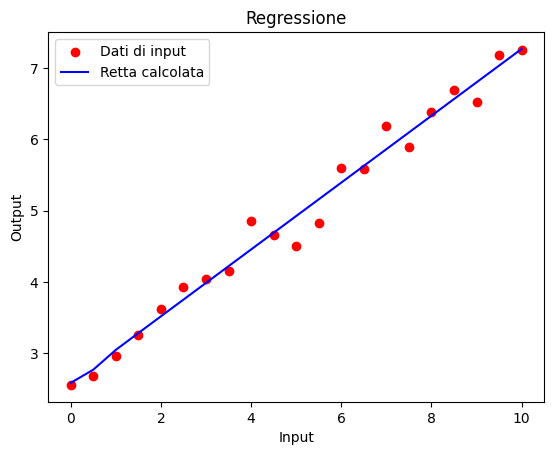

In [ ]:
import matplotlib.pyplot as plt

# Tracciamento del plot
plt.scatter(data[:, 0], data[:, 1], color='red', label='Dati di input')
plt.plot(x_train.numpy(), predicted.numpy(), color='blue', label='Retta calcolata')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Regressione')
plt.legend()
plt.show()


In [ ]:
# Salva l'immagine del grafico della rete neurale con i pesi
dummy_input = torch.randn(1, 1)
output = net(dummy_input)
dot = make_dot(output, params=dict(net.named_parameters()))
dot.format = 'png'
dot.render('/content/drive/MyDrive/symbolic_custom_layer/network_graph')


'/content/drive/MyDrive/symbolic_custom_layer/network_graph.png'

# TEST ➝ 5ª implementazione

In [234]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import numpy as np

# Dati di input standard
data_na2 = np.array([[0, 2.5584 , 0.2322 , 0.3333],
                 [0.5000, 2.6882 , 0.7121 , 1.5200],
                 [1.0000, 2.9627 , 0.9321 , 2.0032],
                 [1.5000, 3.2608 , 1.0534 , 2.8029],
                 [2.0000, 3.6235 , 1.3290 , 3.4301],
                 [2.5000, 3.9376 , 1.5928 , 3.6232],
                 [3.0000, 4.0383 , 1.8765 , 4.0382],
                 [3.5000, 4.1570 , 1.9888 , 4.3243],
                 [4.0000, 4.8498 , 2.4822 , 5.5000],
                 [4.5000, 4.6561 , 2.9987 , 6.0121],
                 [5.0000, 4.5119 , 3.4312 , 6.3242],
                 [5.5000, 4.8346 , 3.7816 , 6.6789],
                 [6.0000, 5.6039 , 3.9817 , 6.9039],
                 [6.5000, 5.5890 , 4.3171 , 7.1231],
                 [7.0000, 6.1914 , 4.6765 , 7.3241],
                 [7.5000, 5.8966 , 5.0811 , 7.6271],
                 [8.0000, 6.3866 , 5.4567 , 8.0962],
                 [8.5000, 6.6909 , 6.0122 , 8.2018],
                 [9.0000, 6.5224 , 6.4543 , 8.5124],
                 [9.5000, 7.1803 , 6.9876 , 8.9987],
                 [10.0000, 7.2537 , 7.3242 , 9.9878]])

# Preparazione dei dati
x_train = torch.tensor(data_na2[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data_na2[:, 1], dtype=torch.float32).unsqueeze(1) # Parte standard
y2_train = torch.tensor(data_na2[:, 2], dtype=torch.float32).unsqueeze(1) # Parte infinitesima

In [235]:


class CustomNASingleNeuronLayer(nn.Module):
    def __init__(self, input_size, monosemio):
        super(CustomNASingleNeuronLayer, self).__init__()
        self.input_size = input_size
        self.monosemio = monosemio
        self.weight1 = nn.Parameter(torch.Tensor(input_size))
        self.bias = nn.Parameter(torch.Tensor(1))
        self.bias2 = nn.Parameter(torch.Tensor(1))
        self.weight2 = nn.Parameter(torch.Tensor(input_size))
        self.reset_parameters()

    def reset_parameters(self):
        torch.manual_seed(42)
        init.normal_(self.weight1)
        init.normal_(self.bias)
        init.normal_(self.bias2)
        init.normal_(self.weight2)

    def forward(self, x):
        if self.monosemio == 1:
            output = torch.matmul(x, self.weight1.t()) + self.bias
        elif self.monosemio == 2:
            output = torch.matmul(x, self.weight2.t()) + self.bias2
        else:
            raise ValueError("Invalid value for monosemio. Supported values are 1 and 2.")
        return output

    def set_monosemio(self, monosemio):
        self.monosemio = monosemio

In [236]:


# Definizione della rete neurale
class NeuralNet(nn.Module):
    def __init__(self, monosemio):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.custom_layer = CustomNASingleNeuronLayer(10, monosemio)  # Custom layer come output layer


    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.custom_layer(x)  # Passaggio attraverso il custom layer
        return x

# Creazione della rete neurale
monosemio = 1
net = NeuralNet(monosemio)

# Stampa dei pesi della rete neurale
for name, param in net.named_parameters():
    print(f'Nome parametro: {name}, Pesi: {param.data}')




Nome parametro: hidden.weight, Pesi: tensor([[ 0.5781],
        [-0.4372],
        [ 0.5773],
        [ 0.1789],
        [ 0.5078],
        [-0.6095],
        [-0.9899],
        [-0.3864],
        [-0.7670],
        [ 0.8205]])
Nome parametro: hidden.bias, Pesi: tensor([ 0.2880,  0.4142,  0.3163, -0.0174,  0.7826, -0.7105,  0.0630, -0.6825,
         0.3084, -0.3444])
Nome parametro: custom_layer.weight1, Pesi: tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229, -0.1863,  2.2082, -0.6380,
         0.4617,  0.2674])
Nome parametro: custom_layer.bias, Pesi: tensor([0.5349])
Nome parametro: custom_layer.bias2, Pesi: tensor([0.8094])
Nome parametro: custom_layer.weight2, Pesi: tensor([ 1.1103, -1.6898, -0.9890,  0.9580,  1.3221,  0.8172, -0.7658, -0.7506,
         1.3525,  0.6863])


In [237]:
#mse calcolata in base al monosemia
#custom mse
import torch
import torch.nn as nn


def compute_loss_m1(input_batch , target_batch1 , target_batch2) :
  old_monosemio = net.custom_layer.monosemio
  #riattacco w1 per computare la loss del w1
  net.custom_layer.weight2.detach_()
  net.custom_layer.bias2.detach_()
  net.custom_layer.weight1.requires_grad_()
  net.custom_layer.bias.requires_grad_()
  net.custom_layer.set_monosemio(1)
  input_batch = input_batch.unsqueeze(1)
  criterion = torch.nn.MSELoss()
  loss = criterion(input_batch, target_batch1)
  outputs_tmp = net(x_train)
  net.custom_layer.set_monosemio(old_monosemio)
  graph1 = make_dot(loss, params=dict(net.named_parameters()))
  return loss


def compute_loss_m2(input_batch , target_batch1 , target_batch2) :
  old_monosemio = net.custom_layer.monosemio
  #riattacco w1 per computare la loss del w1
  net.custom_layer.weight1.detach_()
  net.custom_layer.bias.detach_()

  net.custom_layer.weight2.requires_grad_()

  net.custom_layer.bias2.requires_grad_()
  net.custom_layer.set_monosemio(2)
  input_batch = input_batch.unsqueeze(1)
  criterion = torch.nn.MSELoss()
  loss = criterion(input_batch, target_batch2)
  outputs_tmp = net(x_train)
  net.custom_layer.set_monosemio(old_monosemio)
  graph2 = make_dot(loss, params=dict(net.named_parameters()))
  return loss



def check_update_hidden(projected, loss_m1):
    check = 1
    with torch.no_grad():
        old_hidden_weight = net.hidden.weight.clone()  # backup weight for hidden
        old_hidden_bias = net.hidden.bias.clone()  # backup weight for hidden
        old_bias2_weight = net.custom_layer.bias2.clone()
        old_weight2_weight = net.custom_layer.weight2.clone()
        new_grad = torch.zeros_like(net.hidden.weight)  # Creazione di un tensore di gradiente vuoto con la stessa forma
        new_grad.data.copy_(projected)  # Copia del gradiente modificato nel tensore new_grad
        net.hidden.weight.grad = new_grad  # Assegnazione del tensore new_grad al gradiente del parametro
    # Aggiorna solo i pesi di weight2
    optimizer.step()
    new_loss = compute_loss().item()
    if int(new_loss) != int(loss_m1) :
        with torch.no_grad():
            net.custom_layer.weight2.data = old_weight2_weight.clone()
            net.custom_layer.bias2.data = old_bias2_weight.clone()
            net.hidden.weight.data = old_hidden_weight.clone()
            net.hidden.bias.data = old_hidden_bias.clone()
            check = 0
    #print(check)
    return check





In [226]:
import torch.nn.init as init
import timeit

num_epochs_per_monosemio = 1000
optimizer = optim.SGD(net.parameters(), lr=0.01)
epoch = 0
epoch_m1 = 0
epoch_m2 = 0

grad_directions = []

loss_values_m1 = []
weight1_changes_m1 = []
weight2_changes_m1 = []
hidden_changes_m1 = []
grad_changes_m1 = []
prev_weight1_m1 = None
prev_weight2_m1 = None
prev_hidden_m1 = None

loss_values_m2 = []
weight1_changes_m2 = []
weight2_changes_m2 = []
hidden_changes_m2 = []
grad_changes_m2 = []
prev_weight1_m2 = None
prev_weight2_m2 = None
prev_hidden_m2 = None


while epoch < num_epochs_per_monosemio:
    threshold = 0.04
    outputs = net(x_train)
    # Stampa dei valori intermedi della rete durante la fase di forward
    loss1 = compute_loss_m1(outputs, y_train, y2_train)
    loss2 = compute_loss_m2(outputs, y_train, y2_train)
    #loss1 = 0.03
    if loss1 < threshold :
        '''
        MONOSEMIO 2
        '''
        monosemio = 2
        net.custom_layer.set_monosemio(monosemio)
        optimizer.zero_grad()
        net.custom_layer.weight1.detach_()
        net.custom_layer.bias.detach_()
        net.custom_layer.weight2.requires_grad_()
        net.custom_layer.bias2.requires_grad_()
        #print("weight2 :")
        #print(net.custom_layer.weight2.requires_grad)
        #print("weight1 :")
        #print(net.custom_layer.weight1.requires_grad)

        loss2.backward()

        '''
        METTI QUI IL CODICE PER TESTARE LA PROIEZIONE
        '''
        if old_weight1 is not None:
            new_grad = net.hidden.weight.grad.clone().squeeze()  # Riduce la dimensionalità a 1D
            #vettore ortogonale al vettore dei pesi w1
            orthogonal_vector = torch.tensor([-old_weight1[1], old_weight1[0], -old_weight1[3], old_weight1[2], -old_weight1[5], old_weight1[4], -old_weight1[7], old_weight1[6], -old_weight1[9], old_weight1[8]])  # Calcolo del vettore ortogonale
            #calcolo la proiezione
            dot_product = torch.dot(new_grad, orthogonal_vector)
            norm_squared = torch.dot(orthogonal_vector, orthogonal_vector)
            projected = (dot_product / norm_squared) * orthogonal_vector
            projected = projected.reshape(net.hidden.weight.grad.shape) #lo fa ritornare 2D
            #net.hidden.weight.grad.data.copy_(projected)
            with torch.no_grad():
              new_grad = torch.zeros_like(net.hidden.weight)  # Creazione di un tensore di gradiente vuoto con la stessa forma
              new_grad.data.copy_(projected)  # Copia del gradiente modificato nel tensore new_grad
              net.hidden.weight.grad = new_grad  # Assegnazione del tensore new_grad al gradiente del parametro
            # Aggiorna solo i pesi di weight2
            optimizer.step()

        current_loss = loss2.item()
        loss_values_m2.append(current_loss)  # Aggiungi il valore di loss alla lista
        if epoch_m2 > 1:
            weight1_change = (net.custom_layer.weight1 - prev_weight1_m2).abs().sum().item()
            weight1_changes_m2.append(weight1_change)
            weight2_change = (net.custom_layer.weight2 - prev_weight2_m2).abs().sum().item()
            weight2_changes_m2.append(weight2_change)
            hidden_change = (net.hidden.weight - prev_hidden_m2).abs().sum().item()
            hidden_changes_m2.append(hidden_change)
        prev_weight1_m2 = net.custom_layer.weight1.clone()
        prev_weight2_m2 = net.custom_layer.weight2.clone()
        prev_hidden_m2 = net.hidden.weight.clone()

        epoch_m2 += 1



    else :
        '''
        MONOSEMIO 1
        '''
        monosemio = 1
        net.custom_layer.set_monosemio(monosemio)
        optimizer.zero_grad()
        net.custom_layer.weight2.detach_()
        net.custom_layer.bias2.detach_()
        net.custom_layer.weight1.requires_grad_()
        net.custom_layer.bias.requires_grad_()
        #stampe di controllo se autograd è corretto --> ok
        #print("weight2 :")
        #print(net.custom_layer.weight2.requires_grad)
        #print("weight1 :")
        #print(net.custom_layer.weight1.requires_grad)
        loss1.backward()
        optimizer.step()
        old_weight1 = net.custom_layer.weight1.data.squeeze()

        #variabili per i grafici
        backward_gradients = []
        if epoch_m1 > 0:
            weight1_change = (net.custom_layer.weight1 - prev_weight1_m1).abs().sum().item()
            weight1_changes_m1.append(weight1_change)
            weight2_change = (net.custom_layer.weight2 - prev_weight2_m1).abs().sum().item()
            weight2_changes_m1.append(weight2_change)
            hidden_change = (net.hidden.weight - prev_hidden_m1).abs().sum().item()
            hidden_changes_m1.append(hidden_change)
            grad_change = torch.norm(net.hidden.weight.grad)
            grad_changes_m1.append(grad_change.item())

        prev_weight1_m1 = net.custom_layer.weight1.clone()
        prev_weight2_m1 = net.custom_layer.weight2.clone()
        prev_hidden_m1 = net.hidden.weight.clone()
        current_loss = loss1.item()
        loss_values_m1.append(current_loss)
        epoch_m1 += 1




    #fine update monosemio 1
    epoch += 1

    if epoch % 100 == 0 :
        print(f'Epoch {epoch}/{num_epochs_per_monosemio}, Loss m1: {loss1:.4f} , Loss m2: {loss2:.4f}')
        print (f'Epochm1 : {epoch_m1} , Epochm2 : {epoch_m2}')




Epoch 100/1000, Loss m1: 0.1459 , Loss m2: 1.9667
Epochm1 : 100 , Epochm2 : 0
Epoch 200/1000, Loss m1: 0.0559 , Loss m2: 2.4623
Epochm1 : 200 , Epochm2 : 0
Epoch 300/1000, Loss m1: 0.0442 , Loss m2: 2.6109
Epochm1 : 300 , Epochm2 : 0
Epoch 400/1000, Loss m1: 0.0406 , Loss m2: 2.6522
Epochm1 : 400 , Epochm2 : 0
Epoch 500/1000, Loss m1: 0.0423 , Loss m2: 2.6970
Epochm1 : 496 , Epochm2 : 4
Epoch 600/1000, Loss m1: 0.0569 , Loss m2: 2.4551
Epochm1 : 593 , Epochm2 : 7
Epoch 700/1000, Loss m1: 0.7005 , Loss m2: 1.9150
Epochm1 : 691 , Epochm2 : 9
Epoch 800/1000, Loss m1: 0.0476 , Loss m2: 2.4319
Epochm1 : 782 , Epochm2 : 18
Epoch 900/1000, Loss m1: 0.0457 , Loss m2: 2.4522
Epochm1 : 877 , Epochm2 : 23
Epoch 1000/1000, Loss m1: 0.0444 , Loss m2: 2.4716
Epochm1 : 972 , Epochm2 : 28


###Monosemio 1

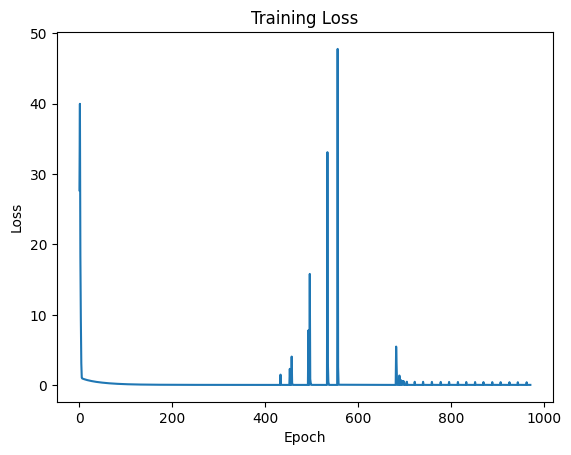

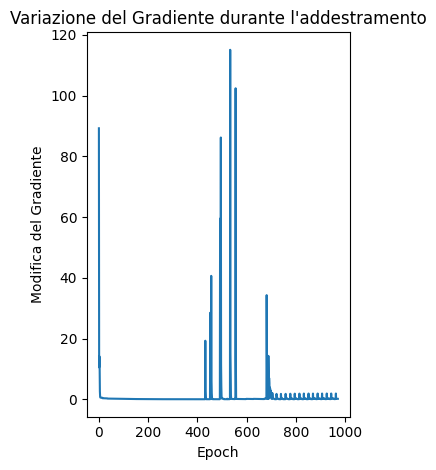

In [227]:
# Traccia il grafico della loss
plt.plot(range(len(loss_values_m1)), loss_values_m1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(grad_changes_m1)
plt.xlabel('Epoch')
plt.ylabel('Modifica del Gradiente')
plt.title('Variazione del Gradiente durante l\'addestramento')

plt.tight_layout()
plt.show()




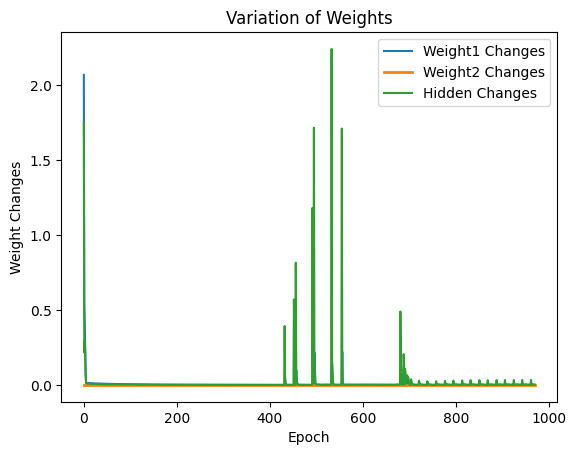

In [228]:

plt.plot(weight1_changes_m1, label='Weight1 Changes')
plt.plot(weight2_changes_m1, label='Weight2 Changes' ,linewidth=2)
plt.plot(hidden_changes_m1, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()




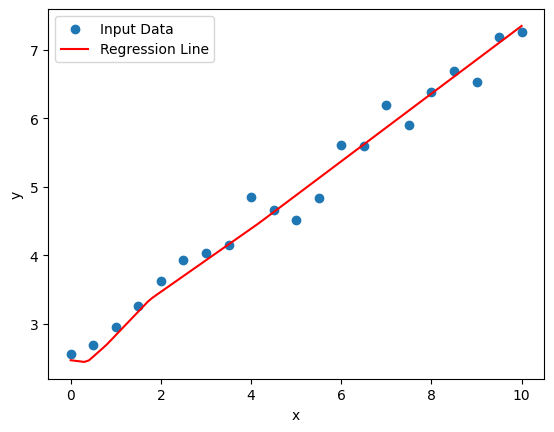

In [229]:

import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 1]  # Terza colonna (target del primo infinitesimo)
net.custom_layer.set_monosemio(1)

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()[0]  # Estrai il valore singolo
bias = net.custom_layer.bias.detach().numpy()[0]  # Estrai il valore singolo

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
x_plot_tensor = torch.from_numpy(x_plot.reshape(-1, 1)).float()  # Converte x_plot in un tensore
y_plot_tensor = net(x_plot_tensor)  # Calcola i valori predetti

y_plot = y_plot_tensor.detach().numpy().flatten()  # Converte il tensore in un array NumPy

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()




###Monosemio 2

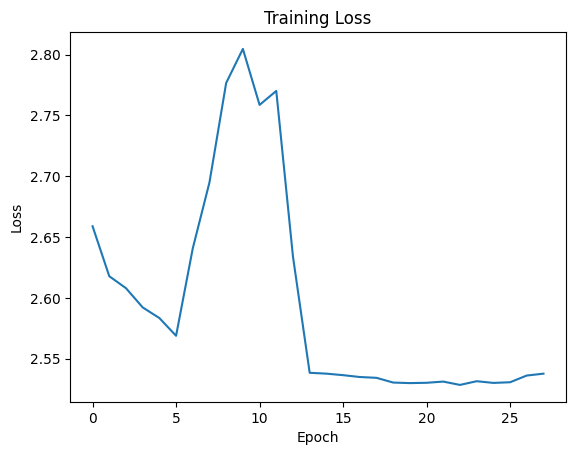

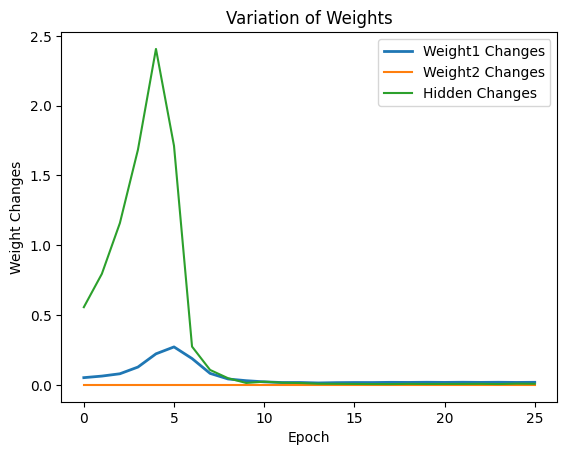

In [230]:

# Traccia il grafico della loss
plt.plot(range(len(loss_values_m2)), loss_values_m2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()



plt.plot(weight1_changes_m2, label='Weight1 Changes' , linewidth=2)
plt.plot(weight2_changes_m2, label='Weight2 Changes')
plt.plot(hidden_changes_m2, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()




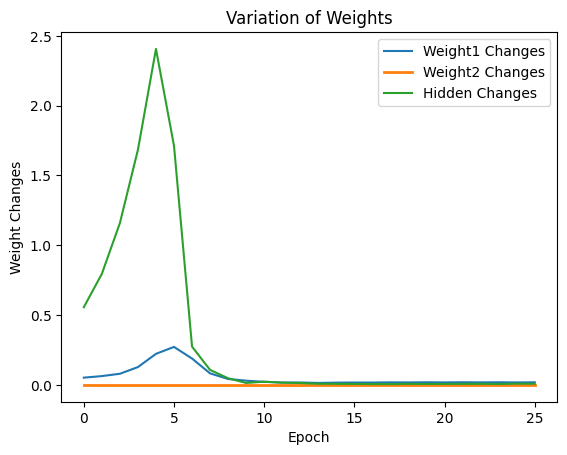

In [231]:

plt.plot(weight1_changes_m2, label='Weight1 Changes')
plt.plot(weight2_changes_m2, label='Weight2 Changes' ,linewidth=2)
plt.plot(hidden_changes_m2, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()




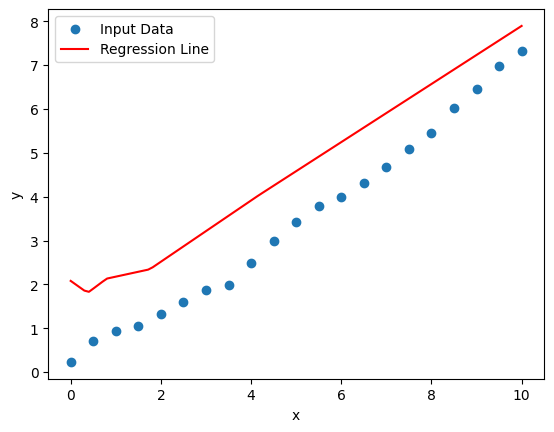

In [232]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 2]  # Terza colonna (target del primo infinitesimo)
net.custom_layer.set_monosemio(2)
net.custom_layer.weight1.detach_()
net.custom_layer.bias.detach_()
net.custom_layer.bias2.requires_grad_()
net.custom_layer.weight2.requires_grad_()

# Dopo l'addestramento
weight2 = net.custom_layer.weight2.detach().numpy()[0]  # Estrai il valore singolo
bias2 = net.custom_layer.bias2.detach().numpy()[0]  # Estrai il valore singolo

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
x_plot_tensor = torch.from_numpy(x_plot.reshape(-1, 1)).float()  # Converte x_plot in un tensore
y_plot_tensor = net(x_plot_tensor)  # Calcola i valori predetti

y_plot = y_plot_tensor.detach().numpy().flatten()  # Converte il tensore in un array NumPy

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


<ipython-input-233-5f2ac3ce644a>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x_train, dtype=torch.float32)


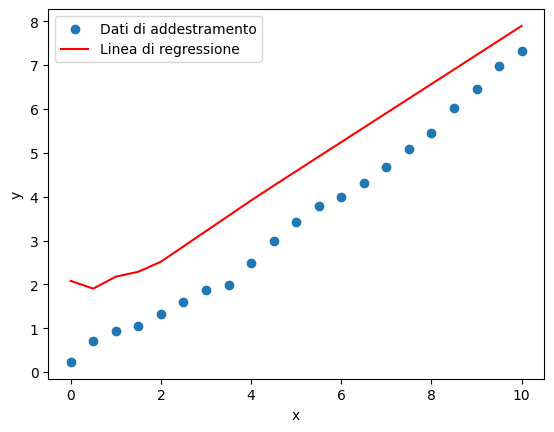

In [233]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

x = torch.tensor(x_train, dtype=torch.float32)
x_hidden = net.hidden(x)
x_relu = net.relu(x_hidden)
output = net.custom_layer(x_relu)

x_train_np = x_train.numpy()
output_np = output.detach().numpy()

plt.scatter(x_train_np, y2_train, label='Dati di addestramento')
plt.plot(x_train_np, output_np, color='r', label='Linea di regressione')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# TEST USED TO CORRECT IMPLEMENTATION

### Check loss

In [ ]:
import torch
import torch.nn as nn
loss_values = []
# Define the CustomMSELossProva class
class CustomMSELossProva(nn.Module):
    def __init__(self, monosemio):
        super(CustomMSELossProva, self).__init__()
        self.monosemio = monosemio

    def forward(self, input, target, target1):
        if self.monosemio == 1:
            loss = torch.mean(torch.pow((input - target), 2))  # Comparison between the output and target1
        elif self.monosemio == 2:
            loss = torch.mean(torch.pow((input - target1), 2))  # Comparison between the output and target2
        else:
            raise ValueError("The value of monosemio must be 1 or 2.")
        return loss

monosemio = 1
# Create an instance of the CustomMSELossProva class
loss_function = CustomMSELossProva(monosemio)
# Generate a random input vector of 10 elements

input = torch.tensor([1,2,3,1,1,1,2,3], dtype = torch.float32)
target = torch.tensor([0 , 1 , 2, 3, 1 , 1, 4, 2] , dtype = torch.float32)
target1 = torch.randn(10)
loss = loss_function(input, target, target1)
print("Loss:", loss.item())
print(input-target)

Loss: 1.5
tensor([ 1.,  1.,  1., -2.,  0.,  0., -2.,  1.])


###Check Projection

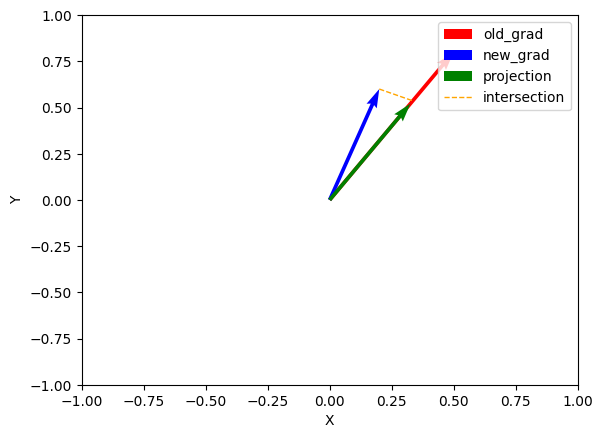

In [ ]:
import torch
import matplotlib.pyplot as plt

# Creazione dei vettori old_grad e new_grad
old_grad = torch.tensor([0.5, 0.8])  # Modifica i valori qui se necessario
new_grad = torch.tensor([0.2, 0.6])  # Modifica i valori qui se necessario

# Calcolo della proiezione
dot_product = torch.dot(new_grad, old_grad)
norm_squared = torch.dot(old_grad, old_grad)
projection = (dot_product / norm_squared) * old_grad

# Calcolo delle coordinate dell'intersezione
intersection = (projection / torch.norm(projection)) * torch.norm(new_grad)

# Plot dei vettori
plt.quiver(0, 0, old_grad[0], old_grad[1], angles='xy', scale_units='xy', scale=1, color='r', label='old_grad')
plt.quiver(0, 0, new_grad[0], new_grad[1], angles='xy', scale_units='xy', scale=1, color='b', label='new_grad')
plt.quiver(0, 0, projection[0], projection[1], angles='xy', scale_units='xy', scale=1, color='g', label='projection')

# Aggiunta della linea che collega new_grad all'intersezione con old_grad
plt.plot([new_grad[0], intersection[0]], [new_grad[1], intersection[1]], color='orange', linestyle='--', linewidth=1, label='intersection')

# Impostazioni del grafico
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Mostrare il grafico
plt.show()


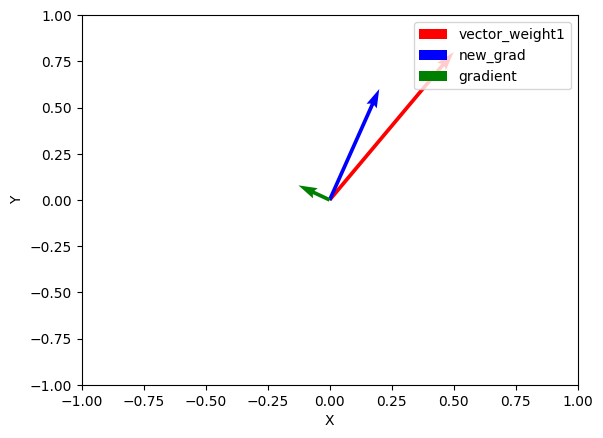

In [ ]:
#prendiamo la proiezione sul piano ortogonale alprecedente gradiente
import torch
import matplotlib.pyplot as plt

old_grad = torch.tensor([0.5, 0.8])
new_grad = torch.tensor([0.2, 0.6])

orthogonal_vector = torch.tensor([-old_grad[1], old_grad[0]])
dot_product = torch.dot(new_grad, orthogonal_vector)
norm_squared = torch.dot(orthogonal_vector, orthogonal_vector)
gradient = (dot_product / norm_squared) * orthogonal_vector
#inverted_gradient = gradient * -1

plt.quiver(0, 0, old_grad[0], old_grad[1], angles='xy', scale_units='xy', scale=1, color='r', label='vector_weight1')
plt.quiver(0, 0, new_grad[0], new_grad[1], angles='xy', scale_units='xy', scale=1, color='b', label='new_grad')
plt.quiver(0, 0, gradient[0], gradient[1], angles='xy', scale_units='xy', scale=1, color='g', label='gradient')

#plt.quiver(0, 0, inverted_gradient[0], inverted_gradient[1], angles='xy', scale_units='xy', scale=1, color='black', label='inverted_gradient')


plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Mostrare il grafico
plt.show()


###Check Projection Plane

In [ ]:

import torch

def orthogonal_projection(new_grad, old_grad, old_grad2):
    dot_product_1 = torch.dot(new_grad, old_grad)
    dot_product_2 = torch.dot(new_grad, old_grad2)
    dot_product_3 = torch.dot(old_grad, old_grad)
    dot_product_4 = torch.dot(old_grad2, old_grad2)

    coefficient = (dot_product_1 * dot_product_4 - dot_product_2 * dot_product_3) / (dot_product_3 * dot_product_4 - dot_product_2**2)

    projection = coefficient * old_grad + (new_grad - coefficient * old_grad2)

    return projection


## TEST correct regression

### Standard Net

Confronto tra NA e non-NA :

* stesse epoch
* same weight inizialization (same seed)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Dati di input standard
data = np.array([[0, 2.5584],
                 [0.5000, 2.6882],
                 [1.0000, 2.9627],
                 [1.5000, 3.2608],
                 [2.0000, 3.6235],
                 [2.5000, 3.9376],
                 [3.0000, 4.0383],
                 [3.5000, 4.1570],
                 [4.0000, 4.8498],
                 [4.5000, 4.6561],
                 [5.0000, 4.5119],
                 [5.5000, 4.8346],
                 [6.0000, 5.6039],
                 [6.5000, 5.5890],
                 [7.0000, 6.1914],
                 [7.5000, 5.8966],
                 [8.0000, 6.3866],
                 [8.5000, 6.6909],
                 [9.0000, 6.5224],
                 [9.5000, 7.1803],
                 [10.0000, 7.2537]])

# Preparazione dei dati
x_train = torch.tensor(data[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data[:, 1], dtype=torch.float32).unsqueeze(1)

# Definizione della rete neurale
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.output = nn.Linear(10, 1)  # Output layer con 1 neurone

        # Inizializzazione dei pesi a 0.5 per tutti i layer
        nn.init.constant_(self.hidden.weight, 0.5)
        nn.init.constant_(self.hidden.bias, 0.5)
        nn.init.constant_(self.output.weight, 0.5)
        nn.init.constant_(self.output.bias, 0.5)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Creazione della rete neurale
net = NeuralNet()

In [ ]:
# Definizione di funzione di perdita e ottimizzatore
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Addestramento della rete neurale
num_epochs = 1
for epoch in range(num_epochs):
    if epoch == 0:
        # Stampa dei pesi della rete neurale
        for name, param in net.named_parameters():
            print(f'Nome parametro: {name}, Pesi: {param.data}')

    optimizer.zero_grad()  # Azzeramento dei gradienti
    outputs = net(x_train)  # Calcolo delle predizion
    print("______________________XTRAIN:")
    print(x_train)

    # Stampa dei valori intermedi della rete durante la fase di forward
    print("______________________Valori intermedi durante il forward:_____________________")
    print(f'Input: {x_train}')
    print(f'Hidden layer output: {net.hidden(x_train)}')
    print(f'Custom layer output: {net.output(net.relu(net.hidden(x_train)))}')
    print(f'Output: {outputs}')

    loss = criterion(outputs, y_train)  # Calcolo della perdita
    loss.backward()  # Calcolo dei gradienti

    # Stampa dei gradienti durante la fase di backward
    print("_______________________Gradienti durante il backward:______________________________")
    print(f'Loss m1 : {loss} ')
    print(f'Hidden layer gradient: {net.hidden.weight.grad}, {net.hidden.bias.grad}')
    print(f'Custom layer gradient: {net.output.weight.grad}, {net.output.bias.grad}')

    optimizer.step()  # Aggiornamento dei pesi

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')


Nome parametro: hidden.weight, Pesi: tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]])
Nome parametro: hidden.bias, Pesi: tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000])
Nome parametro: output.weight, Pesi: tensor([[0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
         0.5000]])
Nome parametro: output.bias, Pesi: tensor([0.5000])
______________________XTRAIN:
tensor([[ 0.0000],
        [ 0.5000],
        [ 1.0000],
        [ 1.5000],
        [ 2.0000],
        [ 2.5000],
        [ 3.0000],
        [ 3.5000],
        [ 4.0000],
        [ 4.5000],
        [ 5.0000],
        [ 5.5000],
        [ 6.0000],
        [ 6.5000],
        [ 7.0000],
        [ 7.5000],
        [ 8.0000],
        [ 8.5000],
        [ 9.0000],
        [ 9.5000],
        [10.0000]])
______________________Valori in

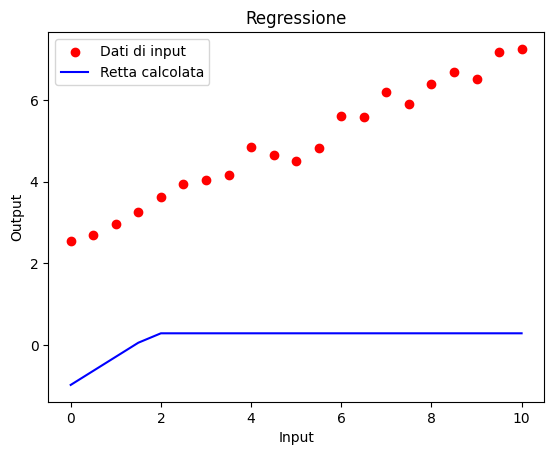

In [ ]:
# Calcolo delle predizioni
predicted = net(x_train)

# Tracciamento del plot
plt.scatter(data[:, 0], data[:, 1], color='red', label='Dati di input')
plt.plot(x_train.numpy(), predicted.detach().numpy(), color='blue', label='Retta calcolata')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Regressione')
plt.legend()
plt.show()




In [ ]:
import torch

output = torch.tensor([[ 3.0000],
                      [ 4.2500],
                      [ 5.5000],
                      [ 6.7500],
                      [ 8.0000],
                      [ 9.2500],
                      [10.5000],
                      [11.7500],
                      [13.0000],
                      [14.2500],
                      [15.5000],
                      [16.7500],
                      [18.0000],
                      [19.2500],
                      [20.5000],
                      [21.7500],
                      [23.0000],
                      [24.2500],
                      [25.5000],
                      [26.7500],
                      [28.0000]])

data = torch.tensor([[ 2.5584],
                     [ 2.6882],
                     [ 2.9627],
                     [ 3.2608],
                     [ 3.6235],
                     [ 3.9376],
                     [ 4.0383],
                     [ 4.1570],
                     [ 4.8498],
                     [ 4.6561],
                     [ 4.5119],
                     [ 4.8346],
                     [ 5.6039],
                     [ 5.5890],
                     [ 6.1914],
                     [ 5.8966],
                     [ 6.3866],
                     [ 6.6909],
                     [ 6.5224],
                     [ 7.1803],
                     [ 7.2537]])

criterion = torch.nn.MSELoss()
loss = criterion(output, data)
print("MSE Loss:", loss.item())



# Dati di input standard
data_na2 = np.array([[0, 2.5584, 0.3456],
                     [0.5000, 2.6882, 0.2345],
                     [1.0000, 2.9627, 0.6789],
                     [1.5000, 3.2608, 0.9876],
                     [2.0000, 3.6235, 0.1234],
                     [2.5000, 3.9376, 0.5678],
                     [3.0000, 4.0383, 0.8765],
                     [3.5000, 4.1570, 0.4321],
                     [4.0000, 4.8498, 0.7890],
                     [4.5000, 4.6561, 0.6543],
                     [5.0000, 4.5119, 0.9012],
                     [5.5000, 4.8346, 0.3456],
                     [6.0000, 5.6039, 0.2345],
                     [6.5000, 5.5890, 0.6789],
                     [7.0000, 6.1914, 0.9876],
                     [7.5000, 5.8966, 0.1234],
                     [8.0000, 6.3866, 0.5678],
                     [8.5000, 6.6909, 0.8765],
                     [9.0000, 6.5224, 0.4321],
                     [9.5000, 7.1803, 0.7890],
                     [10.0000, 7.2537, 0.6543]])



output_na = torch.tensor([ 3.0000,  4.2500,  5.5000,  6.7500,  8.0000,  9.2500, 10.5000, 11.7500,
        13.0000, 14.2500, 15.5000, 16.7500, 18.0000, 19.2500, 20.5000, 21.7500,
        23.0000, 24.2500, 25.5000, 26.7500, 28.0000])


output_st = torch.tensor([[ 3.0000],
        [ 4.2500],
        [ 5.5000],
        [ 6.7500],
        [ 8.0000],
        [ 9.2500],
        [10.5000],
        [11.7500],
        [13.0000],
        [14.2500],
        [15.5000],
        [16.7500],
        [18.0000],
        [19.2500],
        [20.5000],
        [21.7500],
        [23.0000],
        [24.2500],
        [25.5000],
        [26.7500],
        [28.0000]])

# Preparazione dei dati
x_train = torch.tensor(data_na2[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data_na2[:, 1], dtype=torch.float32).unsqueeze(1) # Parte standard
y2_train = torch.tensor(data_na2[:, 2], dtype=torch.float32).unsqueeze(1) # Parte infinitesima


criterion = torch.nn.MSELoss()
loss = criterion(output_na, y_train)
print("MSE Loss na:", loss.item())

criterion = torch.nn.MSELoss()
loss = criterion(output_st, y_train)
print("MSE Loss st:", loss.item())


output_na = output_na.unsqueeze(1)

criterion = torch.nn.MSELoss()
loss = criterion(output_na, y_train)
print("MSE Loss convertito na:", loss.item())

MSE Loss: 149.6868438720703
MSE Loss na: 171.21530151367188
MSE Loss st: 149.6868438720703
MSE Loss convertito na: 149.6868438720703


### NA net Monosemio1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import numpy as np

# Dati di input standard
data_na2 = np.array([[0, 2.5584, 0.3456],
                     [0.5000, 2.6882, 0.2345],
                     [1.0000, 2.9627, 0.6789],
                     [1.5000, 3.2608, 0.9876],
                     [2.0000, 3.6235, 0.1234],
                     [2.5000, 3.9376, 0.5678],
                     [3.0000, 4.0383, 0.8765],
                     [3.5000, 4.1570, 0.4321],
                     [4.0000, 4.8498, 0.7890],
                     [4.5000, 4.6561, 0.6543],
                     [5.0000, 4.5119, 0.9012],
                     [5.5000, 4.8346, 0.3456],
                     [6.0000, 5.6039, 0.2345],
                     [6.5000, 5.5890, 0.6789],
                     [7.0000, 6.1914, 0.9876],
                     [7.5000, 5.8966, 0.1234],
                     [8.0000, 6.3866, 0.5678],
                     [8.5000, 6.6909, 0.8765],
                     [9.0000, 6.5224, 0.4321],
                     [9.5000, 7.1803, 0.7890],
                     [10.0000, 7.2537, 0.6543]])

# Preparazione dei dati
x_train = torch.tensor(data_na[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data_na[:, 1], dtype=torch.float32).unsqueeze(1) # Parte standard
y2_train = torch.tensor(data_na2[:, 2], dtype=torch.float32).unsqueeze(1) # Parte infinitesima

class CustomNASingleNeuronLayer(nn.Module):
    def __init__(self, input_size, monosemio):
        super(CustomNASingleNeuronLayer, self).__init__()
        self.input_size = input_size
        self.monosemio = monosemio
        self.weight1 = nn.Parameter(torch.Tensor(input_size))
        self.bias = nn.Parameter(torch.Tensor(1))
        self.bias2 = nn.Parameter(torch.Tensor(1))
        self.weight2 = nn.Parameter(torch.Tensor(input_size))
        self.reset_parameters()

    def reset_parameters(self):
        torch.manual_seed(42)
        init.constant_(self.weight1, 0.5)
        init.constant_(self.bias, 0.5)
        init.constant_(self.bias2, 0.5)
        init.constant_(self.weight2, 0.5)

    def forward(self, x):
        if self.monosemio == 1:
            output = torch.matmul(x, self.weight1.t()) + self.bias
        elif self.monosemio == 2:
            output = torch.matmul(x, self.weight2.t()) + self.bias2
        else:
            raise ValueError("Invalid value for monosemio. Supported values are 1 and 2.")
        return output

    def set_monosemio(self, monosemio):
        self.monosemio = monosemio

# Definizione della rete neurale
class NeuralNet(nn.Module):
    def __init__(self, monosemio):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.custom_layer = CustomNASingleNeuronLayer(10, monosemio)  # Custom layer come output layer
        # Inizializzazione dei pesi a 0.5 per tutti i layer
        nn.init.constant_(self.hidden.weight, 0.5)
        nn.init.constant_(self.hidden.bias, 0.5)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.custom_layer(x)  # Passaggio attraverso il custom layer
        return x

# Creazione della rete neurale
monosemio = 1
net = NeuralNet(monosemio)

# Stampa dei pesi della rete neurale
for name, param in net.named_parameters():
    print(f'Nome parametro: {name}, Pesi: {param.data}')


Nome parametro: hidden.weight, Pesi: tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]])
Nome parametro: hidden.bias, Pesi: tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000])
Nome parametro: custom_layer.weight1, Pesi: tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000])
Nome parametro: custom_layer.bias, Pesi: tensor([0.5000])
Nome parametro: custom_layer.bias2, Pesi: tensor([0.5000])
Nome parametro: custom_layer.weight2, Pesi: tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000,
        0.5000])


In [ ]:
#mse calcolata in base al monosemia
#custom mse
import torch
import torch.nn as nn


#funzione per calcolare la loss del monosemio 1 , ache se stiamo modificando il monosemio 2
def compute_loss_m1(input_batch , target_batch1 , target_batch2) :
  old_monosemio = net.custom_layer.monosemio
  #riattacco w1 per computare la loss del w1
  net.custom_layer.weight2.detach_()
  net.custom_layer.bias2.detach_()
  net.custom_layer.weight1.requires_grad_()
  net.custom_layer.bias.requires_grad_()
  net.custom_layer.set_monosemio(1)
  input_batch = input_batch.unsqueeze(1)
  criterion = torch.nn.MSELoss()
  loss = criterion(input_batch, target_batch1)
  outputs_tmp = net(x_train)
  net.custom_layer.set_monosemio(old_monosemio)
  return loss



def check_update_hidden(projected, loss_m1):
    check = 1
    with torch.no_grad():
        old_hidden_weight = net.hidden.weight.clone()  # backup weight for hidden
        old_hidden_bias = net.hidden.bias.clone()  # backup weight for hidden
        old_bias2_weight = net.custom_layer.bias2.clone()
        old_weight2_weight = net.custom_layer.weight2.clone()
        new_grad = torch.zeros_like(net.hidden.weight)  # Creazione di un tensore di gradiente vuoto con la stessa forma
        new_grad.data.copy_(projected)  # Copia del gradiente modificato nel tensore new_grad
        net.hidden.weight.grad = new_grad  # Assegnazione del tensore new_grad al gradiente del parametro
    # Aggiorna solo i pesi di weight2
    optimizer.step()
    new_loss = compute_loss().item()
    if int(new_loss) != int(loss_m1) :
        with torch.no_grad():
            net.custom_layer.weight2.data = old_weight2_weight.clone()
            net.custom_layer.bias2.data = old_bias2_weight.clone()
            net.hidden.weight.data = old_hidden_weight.clone()
            net.hidden.bias.data = old_hidden_bias.clone()
            check = 0
    #print(check)
    return check



In [ ]:


import torch.nn.init as init
num_epochs_per_monosemio = 500
optimizer = optim.SGD(net.parameters(), lr=0.01)
epoch = 0
epoch_m1 = 0
epoch_m2 = 0

while epoch < num_epochs_per_monosemio:
    threshold = 0.04
    outputs = net(x_train)
    print(x_train)
    # Stampa dei valori intermedi della rete durante la fase di forward
    '''
    print("______________________Valori intermedi durante il forward:_____________________")
    print(f'Input: {x_train}')
    print(f'Hidden layer output: {net.hidden(x_train)}')
    print(f'Custom layer custom_layer: {net.custom_layer(net.relu(net.hidden(x_train)))}')
    print(f'Output lala: {outputs}')
    '''
    loss1 = compute_loss_m1(outputs, y_train, y2_train)
    loss2 = compute_loss_m2(outputs, y_train, y2_train)
    if loss1 < threshold :
        '''
        MONOSEMIO 2
        '''
        epoch = 501


    else :
        '''
        MONOSEMIO 1
        '''
        if epoch == 0:
            # Stampa dei pesi della rete neurale
            for name, param in net.named_parameters():
                print(f'Nome parametro: {name}, Pesi: {param.data}')
        monosemio = 1
        net.custom_layer.set_monosemio(monosemio)
        optimizer.zero_grad()
        net.custom_layer.weight2.detach_()
        net.custom_layer.bias2.detach_()
        net.custom_layer.weight1.requires_grad_()
        net.custom_layer.bias.requires_grad_()
        loss1.backward()
        '''
        # Stampa dei gradienti durante la fase di backward
        print("_______________________Gradienti durante il backward:______________________________")
        print(f'Loss m1 : {loss1} ')
        print(f'Hidden layer gradient: {net.hidden.weight.grad}, {net.hidden.bias.grad}')
        print(f'Custom layer gradient: {net.custom_layer.weight1.grad}, {net.custom_layer.bias.grad}')
'''
        optimizer.step()
        graph1 = make_dot(loss1, params=dict(net.named_parameters()))


    #fine update monosemio 1
    epoch += 1

    if epoch % 100 == 0 :
        print(f'Epoch {epoch}/{num_epochs_per_monosemio}, Loss m1: {loss1:.4f} , Loss m2: {loss2:.4f}')
        print (f'Epochm1 : {epoch_m1} , Epochm2 : {epoch_m2}')



Output streaming troncato alle ultime 5000 righe.
        [ 2.0000],
        [ 2.5000],
        [ 3.0000],
        [ 3.5000],
        [ 4.0000],
        [ 4.5000],
        [ 5.0000],
        [ 5.5000],
        [ 6.0000],
        [ 6.5000],
        [ 7.0000],
        [ 7.5000],
        [ 8.0000],
        [ 8.5000],
        [ 9.0000],
        [ 9.5000],
        [10.0000]])
tensor([[ 0.0000],
        [ 0.5000],
        [ 1.0000],
        [ 1.5000],
        [ 2.0000],
        [ 2.5000],
        [ 3.0000],
        [ 3.5000],
        [ 4.0000],
        [ 4.5000],
        [ 5.0000],
        [ 5.5000],
        [ 6.0000],
        [ 6.5000],
        [ 7.0000],
        [ 7.5000],
        [ 8.0000],
        [ 8.5000],
        [ 9.0000],
        [ 9.5000],
        [10.0000]])
tensor([[ 0.0000],
        [ 0.5000],
        [ 1.0000],
        [ 1.5000],
        [ 2.0000],
        [ 2.5000],
        [ 3.0000],
        [ 3.5000],
        [ 4.0000],
        [ 4.5000],
        [ 5.0000],
        [ 5.5000]

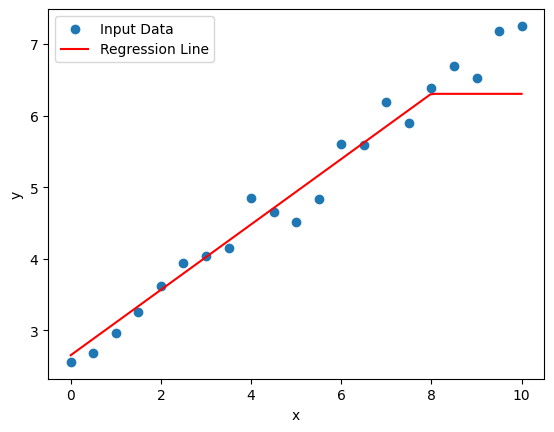

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 1]  # Terza colonna (target del primo infinitesimo)
net.custom_layer.set_monosemio(1)

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()[0]  # Estrai il valore singolo
bias = net.custom_layer.bias.detach().numpy()[0]  # Estrai il valore singolo

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
x_plot_tensor = torch.from_numpy(x_plot.reshape(-1, 1)).float()  # Converte x_plot in un tensore
y_plot_tensor = net(x_plot_tensor)  # Calcola i valori predetti

y_plot = y_plot_tensor.detach().numpy().flatten()  # Converte il tensore in un array NumPy

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



#CIMITERO

##NA LINEAR REGRESSION  ➝ 1ª implementazione (problema autograd)

ERRORI :
loss troppo alta , cose provate :


*   modifica inizializzazzione weight 1
*   numero neuroni hidden
*   aumentato # epoch
*   diminuito lr



In [ ]:
# Preparazione dei dati
x_train = torch.tensor(data_na[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data_na[:, 1], dtype=torch.float32).unsqueeze(1) #parte standard (1 problema)
y2_train = torch.tensor(data_na[:, 2], dtype=torch.float32).unsqueeze(1) #parte infinitesima (2 problema)

In [ ]:
#custom layer
#batch size = 1
#input size = 10 se il mio hidden layer ha 10 neuroni
import torch.nn.init as init

class CustomNASingleNeuronLayer(nn.Module):
    def __init__(self, input_size , monosemio):
        super(CustomNASingleNeuronLayer, self).__init__()
        #self.weight1 = nn.Parameter(torch.randn(1, input_size))
        self.weight1 = nn.Parameter(torch.empty(1, input_size))
        self.weight2 = nn.Parameter(torch.randn(1, input_size))
        self.bias = nn.Parameter(torch.randn(1))
        self.monosemio = monosemio
        init.xavier_uniform_(self.weight1)

    def forward(self, x):
        output = x[:, 0].unsqueeze(1) * self.weight1 + x[:, 1].unsqueeze(1) * self.weight2 + self.bias
        #print("Forward output:", output)  # Stampa il valore di output
        return output


    def custom_backward(self, grad_output):
        if self.monosemio == 1:
            grad_input = torch.matmul(grad_output, self.weight1.t())
            grad_weight = torch.matmul(x.t(), grad_output)
            self.weight1.grad = grad_weight
            self.weight2.grad = None
            print("Grad weight1:", grad_weight)
            print("ciao")
        elif self.monosemio == 2:
            grad_input = torch.matmul(grad_output, self.weight2.t())
            grad_weight = torch.matmul(x.t(), grad_output)
            self.weight1.grad = None
            self.weight2.grad = grad_weight
            print("Grad weight2:", grad_weight)
            print("ciao2")
        else:
            raise ValueError("Il valore di monosemio deve essere 1 o 2.")

        grad_bias = grad_output.mean(dim=0)
        self.bias.grad = grad_bias
        print("ciao3")

        print("Custom backward - Grad input:", grad_input)  # Stampa il gradiente di input
        print("Custom backward - Grad weight1:", self.weight1.grad)  # Stampa il gradiente di weight1
        print("Custom backward - Grad weight2:", self.weight2.grad)  # Stampa il gradiente di weight2
        print("Custom backward - Grad bias:", self.bias.grad)  # Stampa il gradiente del bias

        return grad_input

    def set_monosemio(self, monosemio):
        self.monosemio = monosemio

Ultimo layer NA

In [ ]:
#definizione della dnn con il layer custom
class NeuralNet(nn.Module):
    def __init__(self , monosemio):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 64)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.custom_layer = CustomNASingleNeuronLayer(64, monosemio)  # Custom layer come output layer


    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.custom_layer(x)  # Passaggio attraverso il custom layer
        #print("Forward output:", x)  # Stampa il valore di output
        return x


    def backward(self, loss):
        loss.backward()  # Esegue la backward sulla loss
        #print("Backward - Loss:", loss)  # Stampa il valore della loss
        self.custom_layer.custom_backward(loss.grad_fn)
        print('AAAAAAAAAAAAAAAAAAAAAAA')



# Creazione della rete neurale
monosemio = 1
net = NeuralNet(monosemio)


In [ ]:
#mse calcolata in base al monosemia
#custom mse
import torch
import torch.nn as nn

class CustomMSELoss(nn.Module):
    def __init__(self, monosemio):
        super(CustomMSELoss, self).__init__()
        self.monosemio = monosemio

    def forward(self, input, target , target1):
        if self.monosemio == 1:
            #target parte intera
            loss = torch.mean(torch.pow((input[:, 0] - target), 2))  # Considera solo il valore associato al weight1
            #print(loss)
        elif self.monosemio == 2:
            loss = torch.mean(torch.pow((input[:, 1] - target1), 2))  # Considera solo il valore associato al weight2
        else :
            raise ValueError("Il valore di monosemio deve essere 1, 2 o 3.")
        return loss


#criterio
#monosemio = 2  # Sostituisci con il valore desiderato (1, 2 o 3) in base a che monosemio voglio applicare la loss
#criterion = CustomMSELoss(monosemio)

#fare la loss
#loss = criterion(outputs, y_train)  # Calcolo della perdita con la custom loss

Monosemio: 1, Epoch 100/1000, Loss: 2.5228
Monosemio: 1, Epoch 200/1000, Loss: 2.0696
Monosemio: 1, Epoch 300/1000, Loss: 2.0616
Monosemio: 1, Epoch 400/1000, Loss: 2.0615
Monosemio: 1, Epoch 500/1000, Loss: 2.0615
Monosemio: 1, Epoch 600/1000, Loss: 2.0615
Monosemio: 1, Epoch 700/1000, Loss: 2.0615
Monosemio: 1, Epoch 800/1000, Loss: 2.0615
Monosemio: 1, Epoch 900/1000, Loss: 2.0615
Monosemio: 1, Epoch 1000/1000, Loss: 2.0615


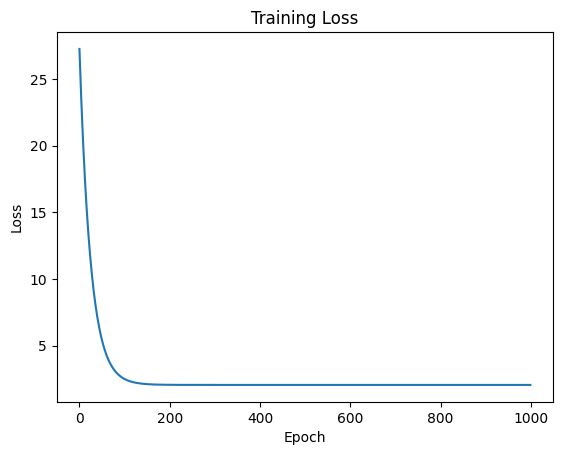

In [ ]:
# Addestramento della rete neurale
num_epochs_per_monosemio = 1000
threshold = 1e-2
old_grad = None  # Inizializza old_grad come un tensore vuoto
optimizer = optim.SGD(net.parameters(), lr=0.01)
loss_values = []  # Lista per memorizzare i valori di loss
current_loss = 300

for monosemio in range(1, 2):
    #optimizer = optim.SGD(net.parameters(), lr=0.01)  # Reinizializzazione dell'ottimizzatore per ogni monosemio
    epoch = 0
    #se sto elaborando il monosemio = 1 --> loss sulla parte standard
    #se sto elaborando il monosemio = 2 --> loss sul primo infinitesimo
    criterion = CustomMSELoss(monosemio)

    optimizer_custom_layer_w1 = optim.SGD([net.custom_layer.weight1 , net.custom_layer.bias], lr=0.01)
    optimizer_custom_layer_w2 = optim.SGD([net.custom_layer.weight2 , net.custom_layer.bias], lr=0.01)
    optimizer_hidden_layer = optim.SGD([net.hidden.weight, net.hidden.bias], lr=0.01)


    # Elimina il grafo di autograd dai tensori coinvolti prima di partire con il monosemio 2
    if monosemio == 2 and epoch==0 :
      #old_grad = net.hidden.weight.grad.clone()
      net.custom_layer.weight1.detach_()
      net.custom_layer.bias.detach_()
      net.hidden.weight.detach_()
      net.hidden.bias.detach_()

    while epoch < num_epochs_per_monosemio and current_loss > threshold:

        if monosemio == 1:
            optimizer_custom_layer_w1.zero_grad()  # Azzeramento dei gradienti del custom layer
            optimizer_hidden_layer.zero_grad()  # Azzeramento dei gradienti del custom layer
            net.custom_layer.weight2.grad = None

            outputs = net(x_train)
            loss = criterion(outputs, y_train, y2_train)
            loss.backward()
            optimizer_custom_layer_w1.step()
            optimizer_hidden_layer.step()
            old_grad = net.hidden.weight.grad
            current_loss = loss.item()
            loss_values.append(current_loss)  # Aggiungi il valore di loss alla lista


        elif monosemio == 2:
            optimizer_custom_layer_w2.zero_grad()
            optimizer_hidden_layer.zero_grad()

            outputs = net(x_train)
            loss = criterion(outputs, y_train, y2_train)
            loss.backward(retain_graph=True)
            #print(old_grad)
            if old_grad is not None:
                new_grad = net.hidden.weight.grad
                projection = new_grad - torch.mm(new_grad, old_grad.t()) * old_grad / torch.mm(old_grad, old_grad.t())
                nn_utils.clip_grad_norm_(projection, max_norm=1.0)  # Normalizza i gradienti
                projection = projection.reshape(net.hidden.weight.grad.shape)
                net.hidden.weight.grad = projection

            optimizer_custom_layer_w2.step()
            optimizer_hidden_layer.step()

            #old_grad = -net.hidden.weight.grad

        else:
            raise ValueError("Il valore di monosemio deve essere compreso tra 1 e 2.")

        current_loss = loss.item()
        epoch += 1

        if epoch % 100 == 0:
            print(f'Monosemio: {monosemio}, Epoch {epoch}/{num_epochs_per_monosemio}, Loss: {current_loss:.4f}')

# Traccia il grafico della loss
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

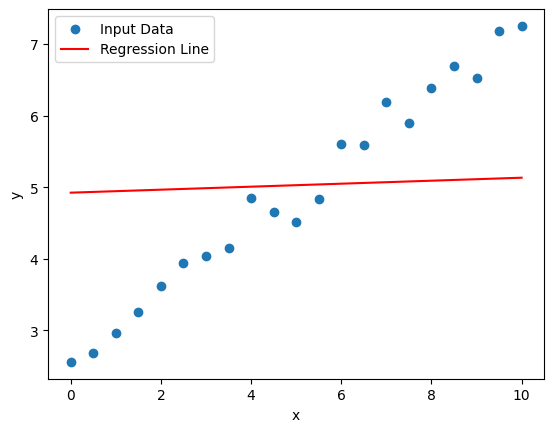

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()
bias = net.custom_layer.bias.detach().numpy()

# Punti di input per la regressione
x = data_na[:, 0]
y = data_na[:, 1]

# Genera dei punti x per il plot
x_plot = np.linspace(min(x), max(x), 100)
# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight1[0][0] * x_plot + bias[0]

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')
# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
#____________________________________________________

##TEST 2  ➝ 2ª implementazione (problema 1 monosemio)

In [ ]:

# Preparazione dei dati
x_train = torch.tensor(data_na[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data_na[:, 1], dtype=torch.float32).unsqueeze(1) #parte standard (1 problema)
y2_train = torch.tensor(data_na[:, 2], dtype=torch.float32).unsqueeze(1) #parte infinitesima (2 problema)





In [ ]:

#custom layer
#batch size = 1
#input size = 10 se il mio hidden layer ha 10 neuroni
import torch.nn.init as init

class CustomNASingleNeuronLayer(nn.Module):
    def __init__(self, input_size , monosemio):
        super(CustomNASingleNeuronLayer, self).__init__()
        self.weight1 = nn.Parameter(torch.empty(1, input_size))
        self.weight2 = nn.Parameter(torch.empty(1, input_size))
        self.bias = nn.Parameter(torch.randn(1))
        self.monosemio = monosemio
        init.xavier_uniform_(self.weight1)
        init.xavier_uniform_(self.weight2)

    def forward(self, x):
        if self.monosemio == 1 :
          output = x[:, 0].unsqueeze(1) * self.weight1 + self.bias
        elif self.monosemio == 2 :
          output = x[:, 1].unsqueeze(1) * self.weight2
        return output

    def set_monosemio(self, monosemio):
        self.monosemio = monosemio


In [ ]:

#definizione della dnn con il layer custom
class NeuralNet(nn.Module):
    def __init__(self , monosemio):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 64)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.custom_layer = CustomNASingleNeuronLayer(64, monosemio)  # Custom layer come output layer


    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.custom_layer(x)  # Passaggio attraverso il custom layer
        return x


# Creazione della rete neurale
monosemio = 1
net = NeuralNet(monosemio)




In [ ]:
#mse calcolata in base al monosemia
#custom mse
import torch
import torch.nn as nn




class CustomMSELoss2(nn.Module):
    def __init__(self, monosemio):
        super().__init__()  # Utilizza super() senza argomenti
        self.monosemio = monosemio
        self.mse_loss = nn.MSELoss()

    def forward(self, input, target, target1=None):
        if self.monosemio == 1:
            loss = self.mse_loss(input , target)
        elif self.monosemio == 2:
            loss = self.mse_loss(input , target1)
        else:
            raise ValueError("Il valore di monosemio deve essere 1 o 2.")
        return loss


class CustomMSELossProva(nn.Module):
    def __init__(self, monosemio):
        super(CustomMSELossProva, self).__init__()
        self.monosemio = monosemio

    def forward(self, input, target, target1 , target2):
        if self.monosemio == 1:
            loss = torch.mean(torch.pow((input - target), 2))  # Confronto tra l'output e il target1
        elif self.monosemio == 2:
            loss = torch.mean(torch.pow((input - target1), 2))  # Confronto tra l'output e il target2
        elif self.monosemio == 3:
            loss = torch.mean(torch.pow((input - target2), 2))  # Confronto tra l'output e il target2
        else:
            raise ValueError("Il valore di monosemio deve essere 1 o 2.")
        return loss


In [ ]:

# Addestramento della rete neurale
num_epochs_per_monosemio = 1000
threshold = 1e-2
loss_values_m1 = []  # Lista per memorizzare i valori di loss del monosemio 1
loss_values_m2 = []  # Lista per memorizzare i valori di loss del monosemio 1
old_grad = None  # Inizializza old_grad come un tensore vuoto
weight1_changes_m1 = []  # Lista per memorizzare la variazione dei pesi di weight1
weight2_changes_m1 = []  # Lista per memorizzare la variazione dei pesi di weight2
hidden_changes_m1 = []  # Lista per memorizzare la variazione dei pesi dell'hidden layer
grad_changes_m1 = []
weight1_changes_m2 = []  # Lista per memorizzare la variazione dei pesi di weight1
weight2_changes_m2 = []  # Lista per memorizzare la variazione dei pesi di weight2
hidden_changes_m2 = []  # Lista per memorizzare la variazione dei pesi dell'hidden layer
grad_changes_m2 = []
grad_directions = []

for monosemio in range(1, 3):
    optimizer = optim.SGD(net.parameters(), lr=0.01)  # Reinizializzazione dell'ottimizzatore per ogni monosemio
    epoch = 0
    criterion = CustomMSELossProva(monosemio)
    prev_weight1 = None
    prev_weight2 = None
    prev_hidden = None
    current_loss = 300
    if monosemio == 2 and epoch==0 :
        #old_grad = net.hidden.weight.grad.clone()
        net.custom_layer.weight1.detach_()
        net.custom_layer.bias.detach_()
        net.custom_layer.weight2.requires_grad_()
    while epoch < num_epochs_per_monosemio and current_loss > threshold:

        if monosemio == 1:
            # Azzerare i gradienti per evitare l'accumulo
            optimizer.zero_grad()
            if epoch==0 :
                #old_grad = net.hidden.weight.grad.clone()
                net.custom_layer.weight2.detach_()
                net.custom_layer.weight1.requires_grad_()
            # Esegui il forward pass
            outputs = net(x_train)
            # Calcola la loss e fai il backward pass
            #loss = criterion(outputs, y_train, y2_train)
            loss = criterion(outputs, y_train, y2_train, y3_train)



            # Calcola i gradienti e fai il backward pass
            loss.backward()


            # Creazione del grafo di autograd
            graph1 = make_dot(loss, params=dict(net.named_parameters()))



            # Aggiorna solo i pesi di weight1
            optimizer.step()

            if epoch > 0:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m1.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m1.append(weight2_change)
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m1.append(hidden_change)
                # Aggiungi la modifica del gradiente
                grad_change = torch.norm(net.hidden.weight.grad)
                grad_changes_m1.append(grad_change.item())

            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_hidden = net.hidden.weight.clone()
            #print(prev_weight1)
            current_loss = loss.item()
            loss_values_m1.append(current_loss)  # Aggiungi il valore di loss alla lista
            old_grad = net.hidden.weight.grad.clone()
            #print(old_grad)

        elif monosemio == 2:
            # Azzerare i gradienti per evitare l'accumulo
            optimizer.zero_grad()
            if epoch==0 :
                #old_grad = net.hidden.weight.grad.clone()
                net.custom_layer.weight1.detach_()
                net.custom_layer.bias.detach_()
                net.custom_layer.weight2.requires_grad_()
            # Imposta monosemio = 2 nella rete neurale
            net.custom_layer.set_monosemio(2)
            # Esegui il forward pass
            outputs = net(x_train)
            # Calcola la loss e fai il backward pass
            #loss = criterion(outputs, y_train, y2_train)
            loss = criterion(outputs, y_train, y2_train, y3_train)



            # Calcola i gradienti e fai il backward pass
            loss.backward()

            # Creazione del grafo di autograd
            graph2 = make_dot(loss, params=dict(net.named_parameters()))


            #print(net.hidden.weight.grad.shape)
            #calcola la proiezione

            if old_grad is not None:
              new_grad = net.hidden.weight.grad.clone()
              projection = new_grad - torch.mm(new_grad.t(), old_grad) * old_grad / torch.mm(old_grad.t(), old_grad)
              #projection = torch.mm(new_grad.t(), old_grad) / torch.mm(old_grad.t(), old_grad) * old_grad

              projection = projection.reshape(net.hidden.weight.grad.shape)
              net.hidden.weight.grad.data.copy_(projection)
              #print(projection.shape)

            # Aggiorna solo i pesi di weight2
            optimizer.step()
            current_loss = loss.item()
            loss_values_m2.append(current_loss)  # Aggiungi il valore di loss alla lista
            if epoch > 1:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m2.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m2.append(weight2_change)
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m2.append(hidden_change)
            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_hidden = net.hidden.weight.clone()

        else:
            raise ValueError("Il valore di monosemio deve essere compreso tra 1 e 2.")


        epoch += 1

        if epoch % 100 == 0:
            print(f'Monosemio: {monosemio}, Epoch {epoch}/{num_epochs_per_monosemio}, Loss: {current_loss:.4f}')
            #print(old_grad.shape)




Monosemio: 1, Epoch 100/1000, Loss: 2.2003
Monosemio: 1, Epoch 200/1000, Loss: 1.5489
Monosemio: 1, Epoch 300/1000, Loss: 0.8654
Monosemio: 1, Epoch 400/1000, Loss: 0.3913
Monosemio: 1, Epoch 500/1000, Loss: 0.1874
Monosemio: 1, Epoch 600/1000, Loss: 0.1000
Monosemio: 1, Epoch 700/1000, Loss: 0.0636
Monosemio: 1, Epoch 800/1000, Loss: 0.0488
Monosemio: 1, Epoch 900/1000, Loss: 0.0429
Monosemio: 1, Epoch 1000/1000, Loss: 0.0406
Monosemio: 2, Epoch 100/1000, Loss: 16.5607
Monosemio: 2, Epoch 200/1000, Loss: 16.5607
Monosemio: 2, Epoch 300/1000, Loss: 16.5607
Monosemio: 2, Epoch 400/1000, Loss: 16.5607
Monosemio: 2, Epoch 500/1000, Loss: 16.5607
Monosemio: 2, Epoch 600/1000, Loss: 16.5607
Monosemio: 2, Epoch 700/1000, Loss: 16.5607
Monosemio: 2, Epoch 800/1000, Loss: 16.5607
Monosemio: 2, Epoch 900/1000, Loss: 16.5607
Monosemio: 2, Epoch 1000/1000, Loss: 16.5607


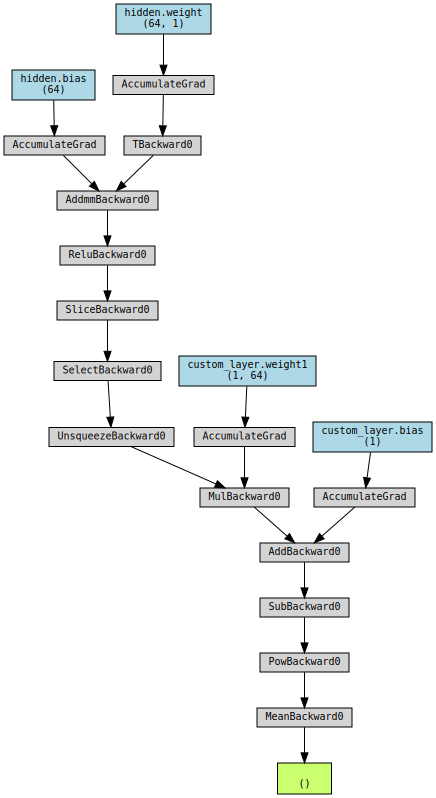

In [ ]:
# Visualizzazione del grafo di autograd
graph1

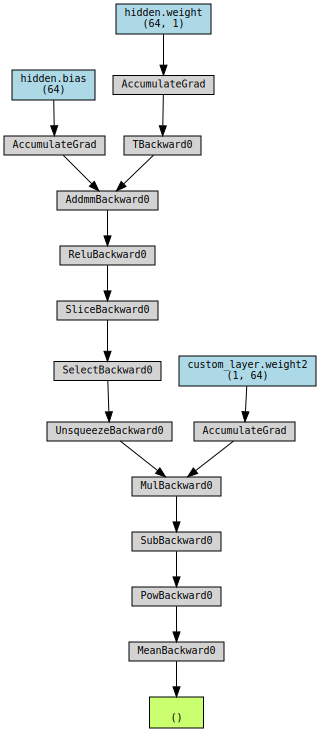

In [ ]:
# Visualizzazione del grafo di autograd
graph2

###  MONOSEMIO 1

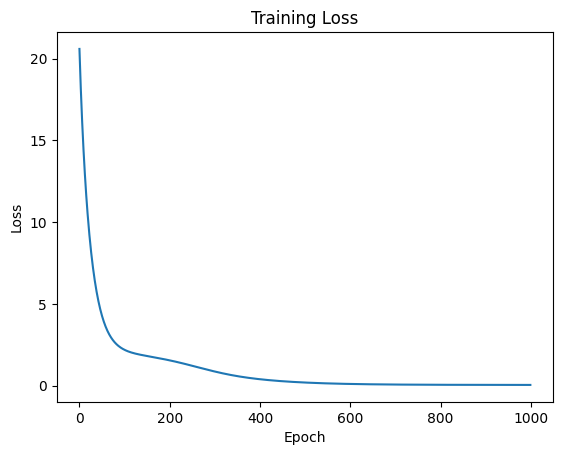

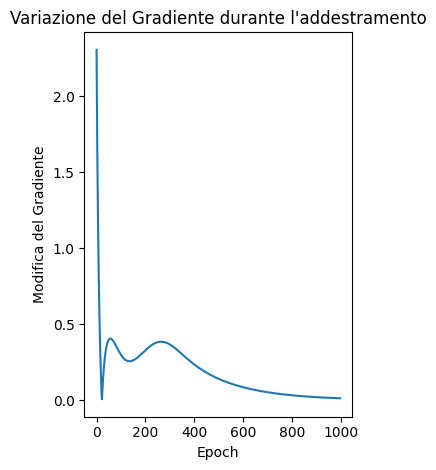

In [ ]:

# Traccia il grafico della loss
plt.plot(range(len(loss_values_m1)), loss_values_m1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(grad_changes_m1)
plt.xlabel('Epoch')
plt.ylabel('Modifica del Gradiente')
plt.title('Variazione del Gradiente durante l\'addestramento')

plt.tight_layout()
plt.show()









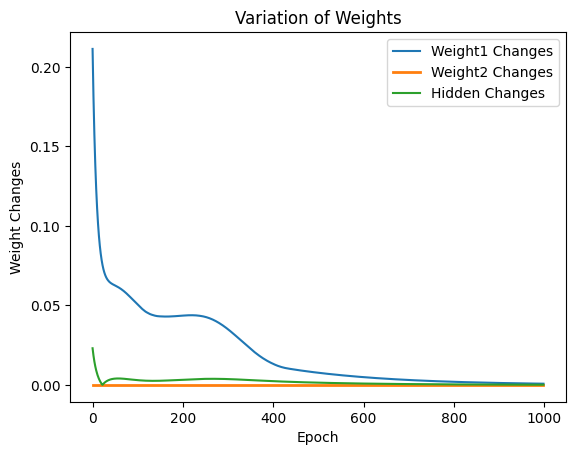

In [ ]:
plt.plot(weight1_changes_m1, label='Weight1 Changes')
plt.plot(weight2_changes_m1, label='Weight2 Changes' ,linewidth=2)
plt.plot(hidden_changes_m1, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()

ValueError: ignored

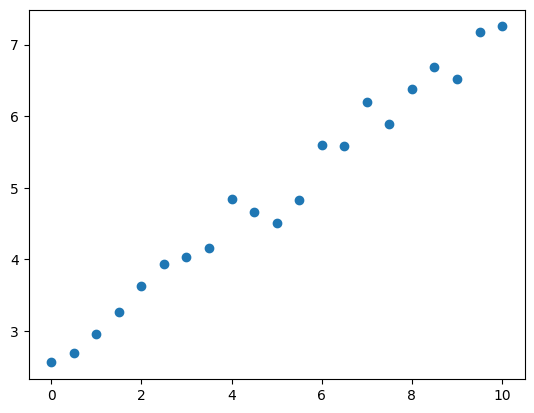

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 1]  # Terza colonna (target del primo infinitesimo)

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()[0]  # Estrai il valore singolo
bias = net.custom_layer.bias.detach().numpy()[0]  # Estrai il valore singolo

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
x_plot_tensor = torch.from_numpy(x_plot.reshape(-1, 1)).float()  # Converte x_plot in un tensore
y_plot_tensor = net(x_plot_tensor)  # Calcola i valori predetti

y_plot = y_plot_tensor.detach().numpy().flatten()  # Converte il tensore in un array NumPy

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### MONOSEMIO 2

In [ ]:

# Traccia il grafico della loss
plt.plot(range(len(loss_values_m2)), loss_values_m2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
plt.plot(weight1_changes_m2, label='Weight1 Changes' , linewidth=2)
plt.plot(weight2_changes_m2, label='Weight2 Changes')
plt.plot(hidden_changes_m2, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 1]  # Terza colonna (target del primo infinitesimo)

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()[0]  # Estrai il valore singolo
bias = net.custom_layer.bias.detach().numpy()[0]  # Estrai il valore singolo

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
x_plot_tensor = torch.from_numpy(x_plot.reshape(-1, 1)).float()  # Converte x_plot in un tensore
y_plot_tensor = net(x_plot_tensor)  # Calcola i valori predetti

y_plot = y_plot_tensor.detach().numpy().flatten()  # Converte il tensore in un array NumPy

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
#plot after change monosemio = 2

import matplotlib.pyplot as plt
import numpy as np

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()
bias = net.custom_layer.bias.detach().numpy()

# Punti di input per la regressione
x = data_na[:, 0]
y = data_na[:, 1]

# Genera dei punti x per il plot
x_plot = np.linspace(min(x), max(x), 100)
# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight1[0][0] * x_plot + bias[0]
#y_plot = weight1[0][0] * x_plot


# Plotta i punti di input
plt.scatter(x, y, label='Input Data')
# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
# Calcola i risultati della regressione per weight1 e weight2
weight1_results = net.custom_layer.weight1.detach().numpy()[0][0] * data_na[:, 0] + net.custom_layer.bias.detach().numpy()[0]
#weight2_results = net.custom_layer.weight2.detach().numpy()[0][0] * data_na[:, 0]
difference = data_na[:, 1] - weight1_results

# Crea il DataFrame di confronto
#df = pd.DataFrame({'Target1': data_na[:, 1],  'Weight1 Results': weight1_results, 'Target2': data_na[:, 2],'Weight2 Results': weight2_results})
df = pd.DataFrame({'Target1': data_na[:, 1],  'Weight1 Results': weight1_results})

df



## TEST CON 3 MONOSEMI 1 HIDDEN

In [ ]:
# Preparazione dei dati
x_train = torch.tensor(data_na2[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data_na2[:, 1], dtype=torch.float32).unsqueeze(1) #parte standard (1 problema)
y2_train = torch.tensor(data_na2[:, 2], dtype=torch.float32).unsqueeze(1) #parte infinitesima (2 problema)
y3_train = torch.tensor(data_na2[:, 3], dtype=torch.float32).unsqueeze(1) #parte infinitesima (3 problema)


In [ ]:
import torch.nn.init as init

class CustomNASingleNeuronLayer(nn.Module):
    def __init__(self, input_size, monosemio):
        super(CustomNASingleNeuronLayer, self).__init__()
        self.input_size = input_size
        self.monosemio = monosemio
        self.weight1 = nn.Parameter(torch.Tensor(input_size))
        self.bias = nn.Parameter(torch.Tensor(1))
        self.weight2 = nn.Parameter(torch.Tensor(input_size))
        self.weight3 = nn.Parameter(torch.Tensor(input_size))
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.normal_(self.weight1)
        nn.init.normal_(self.bias)
        nn.init.normal_(self.weight2)
        nn.init.normal_(self.weight3)

    def forward(self, x):
        if self.monosemio == 1:
            output = torch.matmul(x, self.weight1) + self.bias
        elif self.monosemio == 2:
            output = torch.matmul(x, self.weight2)
        elif self.monosemio == 3:
            output = torch.matmul(x, self.weight3)
        else:
            raise ValueError("Invalid value for monosemio. Supported values are 1 and 2.")
        return output

    def set_monosemio(self, monosemio):
        self.monosemio = monosemio


In [ ]:
#custom layer
#batch size = 1
#input size = 10 se il mio hidden layer ha 10 neuroni
import torch.nn.init as init

class CustomNASingleNeuronLayerOldVersion(nn.Module):
    def __init__(self, input_size , monosemio):
        super(CustomNASingleNeuronLayer, self).__init__()
        self.weight1 = nn.Parameter(torch.empty(1, input_size))
        self.weight2 = nn.Parameter(torch.empty(1, input_size))
        self.weight3 = nn.Parameter(torch.empty(1, input_size))
        self.bias = nn.Parameter(torch.randn(1))
        self.monosemio = monosemio
        init.xavier_uniform_(self.weight1)
        init.xavier_uniform_(self.weight2)
        init.xavier_uniform_(self.weight3)

    def forward(self, x):
        if self.monosemio == 1 :
          output = x[:, 0].unsqueeze(1) * self.weight1 + self.bias
        elif self.monosemio == 2 :
          output = x[:,1].unsqueeze(1) * self.weight2
        elif self.monosemio == 3 :
          output = x[:,2].unsqueeze(1) * self.weight3
        return output

    def set_monosemio(self, monosemio):
        self.monosemio = monosemio


In [ ]:
#definizione della dnn con il layer custom
class NeuralNet(nn.Module):
    def __init__(self , monosemio):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.custom_layer = CustomNASingleNeuronLayer(10, monosemio)  # Custom layer come output layer


    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.custom_layer(x)  # Passaggio attraverso il custom layer
        return x


# Creazione della rete neurale
monosemio = 1
net = NeuralNet(monosemio)


In [ ]:
#mse calcolata in base al monosemia
#custom mse
import torch
import torch.nn as nn


class CustomMSELossProva(nn.Module):
    def __init__(self, monosemio):
        super(CustomMSELossProva, self).__init__()
        self.monosemio = monosemio

    def forward(self, input, target, target1 , target2):
        if self.monosemio == 1:
            loss = torch.mean(torch.pow((input - target), 2))  # Confronto tra l'output e il target1
        elif self.monosemio == 2:
            loss = torch.mean(torch.pow((input - target1), 2))  # Confronto tra l'output e il target2
        elif self.monosemio == 3:
            loss = torch.mean(torch.pow((input - target2), 2))  # Confronto tra l'output e il target2
        else:
            raise ValueError("Il valore di monosemio deve essere 1 o 2.")
        return loss


In [ ]:
# Addestramento della rete neurale
num_epochs_per_monosemio = 240
threshold = 1e-2
loss_values_m1 = []  # Lista per memorizzare i valori di loss del monosemio 1
loss_values_m2 = []  # Lista per memorizzare i valori di loss del monosemio 1
loss_values_m3 = []  # Lista per memorizzare i valori di loss del monosemio 1
old_grad = None  # Inizializza old_grad come un tensore vuoto
weight1_changes_m1 = []  # Lista per memorizzare la variazione dei pesi di weight1
weight2_changes_m1 = []  # Lista per memorizzare la variazione dei pesi di weight2
hidden_changes_m1 = []  # Lista per memorizzare la variazione dei pesi dell'hidden layer
grad_changes_m1 = []
weight1_changes_m2 = []  # Lista per memorizzare la variazione dei pesi di weight1
weight2_changes_m2 = []  # Lista per memorizzare la variazione dei pesi di weight2
hidden_changes_m2 = []  # Lista per memorizzare la variazione dei pesi dell'hidden layer
grad_changes_m2 = []
weight1_changes_m3 = []  # Lista per memorizzare la variazione dei pesi di weight1
weight2_changes_m3 = []  # Lista per memorizzare la variazione dei pesi di weight2
weight3_changes_m3 = []  # Lista per memorizzare la variazione dei pesi di weight2
hidden_changes_m3 = []  # Lista per memorizzare la variazione dei pesi dell'hidden layer
grad_changes_m3 = []
grad_directions = []

for monosemio in range(1, 3):
    optimizer = optim.SGD(net.parameters(), lr=0.01)  # Reinizializzazione dell'ottimizzatore per ogni monosemio
    epoch = 0
    criterion = CustomMSELossProva(monosemio)
    prev_weight1 = None
    prev_weight2 = None
    prev_weight3 = None
    prev_hidden = None
    current_loss = 300
    if monosemio == 2 and epoch==0 :
        #old_grad = net.hidden.weight.grad.clone()
        net.custom_layer.weight1.detach_()
        net.custom_layer.bias.detach_()
        net.custom_layer.weight2.requires_grad_()
    if monosemio == 3 and epoch==0 :
            net.custom_layer.weight2.detach_()
            net.custom_layer.weight3.requires_grad_()
    while epoch < num_epochs_per_monosemio and current_loss > threshold:

        if monosemio == 1:
            # Azzerare i gradienti per evitare l'accumulo
            optimizer.zero_grad()
            if epoch==0 :
                net.custom_layer.weight2.detach_()
                net.custom_layer.weight3.detach_()
                net.custom_layer.weight1.requires_grad_()
            # Esegui il forward pass
            outputs = net(x_train)
            # Calcola la loss e fai il backward pass
            loss = criterion(outputs, y_train, y2_train , y3_train)



            # Calcola i gradienti e fai il backward pass
            loss.backward()


            # Creazione del grafo di autograd
            graph1 = make_dot(loss, params=dict(net.named_parameters()))



            # Aggiorna solo i pesi di weight1
            optimizer.step()

            if epoch > 0:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m1.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m1.append(weight2_change)
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m1.append(hidden_change)
                # Aggiungi la modifica del gradiente
                grad_change = torch.norm(net.hidden.weight.grad)
                grad_changes_m1.append(grad_change.item())

            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_hidden = net.hidden.weight.clone()
            #print(prev_weight1)
            current_loss = loss.item()
            loss_values_m1.append(current_loss)  # Aggiungi il valore di loss alla lista
            old_grad = net.hidden.weight.grad.clone()
            #print(old_grad)

        elif monosemio == 2:
            # Azzerare i gradienti per evitare l'accumulo
            optimizer.zero_grad()
            if epoch==0 :
                net.custom_layer.weight1.detach_()
                net.custom_layer.bias.detach_()
                net.custom_layer.weight2.requires_grad_()
            # Imposta monosemio = 2 nella rete neurale
            net.custom_layer.set_monosemio(2)
            # Esegui il forward pass
            outputs = net(x_train)
            # Calcola la loss e fai il backward pass
            loss = criterion(outputs, y_train, y2_train , y3_train)


            # Calcola i gradienti e fai il backward pass
            loss.backward()

            # Creazione del grafo di autograd
            graph2 = make_dot(loss, params=dict(net.named_parameters()))

            old_grad2 = net.hidden.weight.grad.clone()

            #print(net.hidden.weight.grad.shape)
            #calcola la proiezione

            if old_grad is not None:
              new_grad = net.hidden.weight.grad.clone()
              projection = new_grad - torch.mm(new_grad.t(), old_grad) * old_grad / torch.mm(old_grad.t(), old_grad)
              #projection = torch.mm(new_grad.t(), old_grad) / torch.mm(old_grad.t(), old_grad) * old_grad

              projection = projection.reshape(net.hidden.weight.grad.shape)
              net.hidden.weight.grad.data.copy_(projection)
              #print(projection.shape)

            # Aggiorna solo i pesi di weight2
            optimizer.step()
            current_loss = loss.item()
            loss_values_m2.append(current_loss)  # Aggiungi il valore di loss alla lista
            if epoch > 1:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m2.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m2.append(weight2_change)
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m2.append(hidden_change)
                # Aggiungi la modifica del gradiente
                grad_change = torch.norm(net.hidden.weight.grad)
                grad_changes_m2.append(grad_change.item())
            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_hidden = net.hidden.weight.clone()

        elif monosemio == 3:
            # Imposta monosemio = 3 nella rete neurale
            net.custom_layer.set_monosemio(3)
            # Azzerare i gradienti per evitare l'accumulo
            optimizer.zero_grad()
            if epoch==0 :
                net.custom_layer.weight2.detach_()
                net.custom_layer.weight3.requires_grad_()

            # Esegui il forward pass
            outputs = net(x_train)
            # Calcola la loss e fai il backward pass
            loss = criterion(outputs, y_train, y2_train , y3_train)

            # Calcola i gradienti e fai il backward pass
            loss.backward()

            # Creazione del grafo di autograd
            graph3 = make_dot(loss, params=dict(net.named_parameters()))

            #print(net.hidden.weight.grad.shape)
            #calcola la proiezione

            '''
            Calcola la proiezione del gradiente new_grad su un piano definito dai gradienti precedenti old_grad e old_grad2,
            e assegna questa proiezione come gradiente dell'hidden layer del modello
            '''

            if old_grad is not None and old_grad2 is not None :
              #print(old_grad.shape)
              #print(old_grad2.shape)
              new_grad = net.hidden.weight.grad.clone()
              # Conversione in oggetti di NumPy
              old_grad_np = old_grad.detach().numpy()
              old_grad2_np = old_grad2.detach().numpy()
              # Costruzione della matrice A con i due vettori come colonne
              A = np.column_stack((old_grad, old_grad2))  # shape (64, 2)

              # Calcolo della soluzione del sistema lineare Ax = b, dove b è un vettore di zeri
              b = np.zeros((10, 1))

              # Calcolo dei coefficienti del piano
              plane_coefficients = np.linalg.lstsq(A, b, rcond=None)[0]

              # Salvataggio dei coefficienti del piano nella variabile plane
              plane = plane_coefficients.flatten()

              # Visualizzazione dei coefficienti del piano
              #print(plane)

              # Calcolo della proiezione di new_grad sul piano
              projection = new_grad - np.dot(A, plane_coefficients.reshape(-1, 1))
              # Assegno la proiezione all'hidden layer
              net.hidden.weight.grad.data.copy_(projection)


            # Aggiorna solo i pesi di weight3
            optimizer.step()
            current_loss = loss.item()
            loss_values_m3.append(current_loss)  # Aggiungi il valore di loss alla lista
            if epoch > 1:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m3.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m3.append(weight2_change)
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m3.append(hidden_change)
                weight3_change = (net.custom_layer.weight3 - prev_weight3).abs().sum().item()
                weight3_changes_m3.append(weight3_change)
                # Aggiungi la modifica del gradiente
                grad_change = torch.norm(net.hidden.weight.grad)
                grad_changes_m3.append(grad_change.item())
            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_weight3 = net.custom_layer.weight3.clone()
            prev_hidden = net.hidden.weight.clone()

        else:
            raise ValueError("Il valore di monosemio deve essere compreso tra 1 e 2.")


        epoch += 1

        if epoch % 20 == 0:
            print(f'Monosemio: {monosemio}, Epoch {epoch}/{num_epochs_per_monosemio}, Loss: {current_loss:.4f}')
            #print(old_grad.shape)



Monosemio: 1, Epoch 20/240, Loss: 18.7730
Monosemio: 1, Epoch 40/240, Loss: 2.4602
Monosemio: 1, Epoch 60/240, Loss: 2.2520
Monosemio: 1, Epoch 80/240, Loss: 2.1081
Monosemio: 1, Epoch 100/240, Loss: 2.0741
Monosemio: 1, Epoch 120/240, Loss: 2.0698
Monosemio: 1, Epoch 140/240, Loss: 2.7476
Monosemio: 1, Epoch 160/240, Loss: 2.1078
Monosemio: 1, Epoch 180/240, Loss: 2.0646
Monosemio: 1, Epoch 200/240, Loss: 2.0624
Monosemio: 1, Epoch 220/240, Loss: 2.0619
Monosemio: 1, Epoch 240/240, Loss: 2.0618
Monosemio: 2, Epoch 20/240, Loss: 4.7068
Monosemio: 2, Epoch 40/240, Loss: 4.6154
Monosemio: 2, Epoch 60/240, Loss: 4.6028
Monosemio: 2, Epoch 80/240, Loss: 4.5996
Monosemio: 2, Epoch 100/240, Loss: 4.5979
Monosemio: 2, Epoch 120/240, Loss: 4.5967
Monosemio: 2, Epoch 140/240, Loss: 4.5957
Monosemio: 2, Epoch 160/240, Loss: 4.5947
Monosemio: 2, Epoch 180/240, Loss: 4.5938
Monosemio: 2, Epoch 200/240, Loss: 4.5930
Monosemio: 2, Epoch 220/240, Loss: 4.5922
Monosemio: 2, Epoch 240/240, Loss: 4.5915

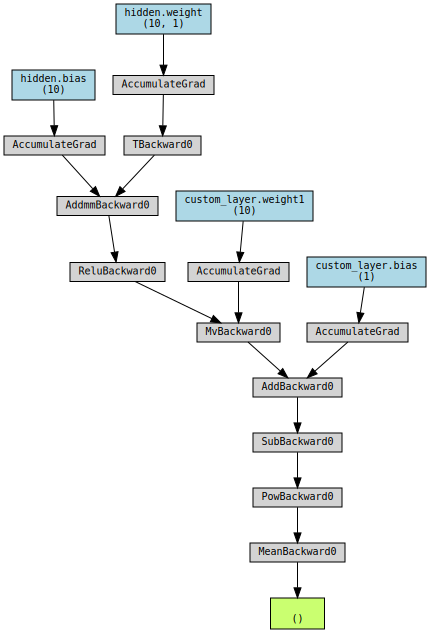

In [ ]:
# Visualizzazione del grafo di autograd
graph1

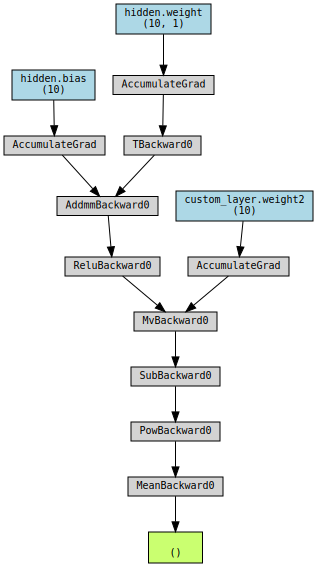

In [ ]:
# Visualizzazione del grafo di autograd
graph2

In [ ]:
# Visualizzazione del grafo di autograd
graph3

NameError: ignored

### Monosemio 1

In [ ]:

# Traccia il grafico della loss
plt.plot(range(len(loss_values_m1)), loss_values_m1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(grad_changes_m1)
plt.xlabel('Epoch')
plt.ylabel('Modifica del Gradiente')
plt.title('Variazione del Gradiente durante l\'addestramento')

plt.tight_layout()
plt.show()









In [ ]:
plt.plot(weight1_changes_m1, label='Weight1 Changes')
plt.plot(weight2_changes_m1, label='Weight2 Changes' ,linewidth=2)
plt.plot(hidden_changes_m1, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()

In [ ]:
'''

import matplotlib.pyplot as plt
import numpy as np

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()
bias = net.custom_layer.bias.detach().numpy()

# Punti di input per la regressione
x = data_na2[:, 0]
y = data_na2[:, 1]

# Genera dei punti x per il plot
x_plot = np.linspace(min(x), max(x), 100)
# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight1[0][0] * x_plot + bias[0]
#y_plot = weight1[0][0] * x_plot


# Plotta i punti di input
plt.scatter(x, y, label='Input Data')
# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


'''

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 1]  # Terza colonna (target del primo infinitesimo)

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()
#bias = net.custom_layer.bias.detach().numpy()

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight1[0] * x_plot + bias[0]
#y_plot = weight1[0] * x_plot

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### Monosemio 2

In [ ]:

# Traccia il grafico della loss
plt.plot(range(len(loss_values_m2)), loss_values_m2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(grad_changes_m2)
plt.xlabel('Epoch')
plt.ylabel('Modifica del Gradiente')
plt.title('Variazione del Gradiente durante l\'addestramento')

plt.tight_layout()
plt.show()









In [ ]:
plt.plot(weight1_changes_m2, label='Weight1 Changes')
plt.plot(weight2_changes_m2, label='Weight2 Changes' ,linewidth=2)
plt.plot(hidden_changes_m2, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()

In [ ]:
'''

import matplotlib.pyplot as plt
import numpy as np

# Dopo l'addestramento
weight2 = net.custom_layer.weight2.detach().numpy()

# Punti di input per la regressione
x = data_na2[:, 0]
y = data_na2[:, 2]

# Genera dei punti x per il plot
x_plot = np.linspace(min(x), max(x), 100)
# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight2[0][0] * x_plot
#y_plot = weight1[0][0] * x_plot


# Plotta i punti di input
plt.scatter(x, y, label='Input Data')
# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


'''

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 2]  # Terza colonna (target del primo infinitesimo)

# Dopo l'addestramento
weight2 = net.custom_layer.weight2.detach().numpy()

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight2[0] * x_plot

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### Monosemio 3

In [ ]:



# Traccia il grafico della loss
plt.plot(range(len(loss_values_m3)), loss_values_m3)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(grad_changes_m3)
plt.xlabel('Epoch')
plt.ylabel('Modifica del Gradiente')
plt.title('Variazione del Gradiente durante l\'addestramento')

plt.tight_layout()
plt.show()









In [ ]:
plt.plot(weight1_changes_m3, label='Weight1 Changes')
plt.plot(weight2_changes_m3, label='Weight2 Changes')
plt.plot(weight3_changes_m3, label='Weight3 Changes' ,linewidth=2)
plt.plot(hidden_changes_m1, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()

In [ ]:
'''

import matplotlib.pyplot as plt
import numpy as np

# Dopo l'addestramento
weight3 = net.custom_layer.weight3.detach().numpy()

# Punti di input per la regressione
x = data_na2[:, 0]
y = data_na2[:, 3]

# Genera dei punti x per il plot
x_plot = np.linspace(min(x), max(x), 100)
# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight3[0][0] * x_plot


# Plotta i punti di input
plt.scatter(x, y, label='Input Data')
# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


'''

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 3]  # Terza colonna (target del primo infinitesimo)

# Dopo l'addestramento
weight3 = net.custom_layer.weight3.detach().numpy()

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight3[0] * x_plot

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## TEST ➝ 3ª implementazione (correct regression but issue with monosemia 2)

In [ ]:
# Preparazione dei dati
x_train = torch.tensor(data_na2[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data_na2[:, 1], dtype=torch.float32).unsqueeze(1) #parte standard (1 problema)
y2_train = torch.tensor(data_na2[:, 2], dtype=torch.float32).unsqueeze(1) #parte infinitesima (2 problema)



In [ ]:
import torch.nn.init as init

class CustomNASingleNeuronLayer(nn.Module):
    def __init__(self, input_size, monosemio):
        super(CustomNASingleNeuronLayer, self).__init__()
        self.input_size = input_size
        self.monosemio = monosemio
        self.weight1 = nn.Parameter(torch.Tensor(input_size))
        self.bias = nn.Parameter(torch.Tensor(1))
        self.bias2 = nn.Parameter(torch.Tensor(1))
        self.weight2 = nn.Parameter(torch.Tensor(input_size))
        self.reset_parameters()

    def reset_parameters(self):
        torch.manual_seed(42)
        init.normal_(self.weight1)
        init.normal_(self.bias)
        init.normal_(self.bias2)
        init.normal_(self.weight2)


    def forward(self, x):
        if self.monosemio == 1:
            output = torch.matmul(x, self.weight1.t()) + self.bias
        elif self.monosemio == 2:
            output = torch.matmul(x, self.weight2.t()) + self.bias2
        else:
            raise ValueError("Invalid value for monosemio. Supported values are 1 and 2.")
        return output

    def set_monosemio(self, monosemio):
        self.monosemio = monosemio





In [ ]:


#definizione della dnn con il layer customù

seed = 42
torch.manual_seed(seed)

class NeuralNet(nn.Module):
    def __init__(self , monosemio):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.custom_layer = CustomNASingleNeuronLayer(10, monosemio)  # Custom layer come output layer
        # Impostazione dei pesi desiderati
        self.custom_layer.weight1.data = torch.tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901, 0.0298, -0.3123]])
        self.custom_layer.bias.data = torch.tensor([0.2856])
        self.custom_layer.bias2.data = torch.tensor([0.2856])


    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.custom_layer(x)  # Passaggio attraverso il custom layer
        return x


# Creazione della rete neurale
monosemio = 1
net = NeuralNet(monosemio)
# Stampa dei pesi della rete neurale
for name, param in net.named_parameters():
    print(f'Nome parametro: {name}, Pesi: {param.data}')




Nome parametro: hidden.weight, Pesi: tensor([[ 0.7645],
        [ 0.8300],
        [-0.2343],
        [ 0.9186],
        [-0.2191],
        [ 0.2018],
        [-0.4869],
        [ 0.5873],
        [ 0.8815],
        [-0.7336]])
Nome parametro: hidden.bias, Pesi: tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
        -0.4668,  0.2549])
Nome parametro: custom_layer.weight1, Pesi: tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
          0.0298, -0.3123]])
Nome parametro: custom_layer.bias, Pesi: tensor([0.2856])
Nome parametro: custom_layer.bias2, Pesi: tensor([0.2856])
Nome parametro: custom_layer.weight2, Pesi: tensor([ 1.1103, -1.6898, -0.9890,  0.9580,  1.3221,  0.8172, -0.7658, -0.7506,
         1.3525,  0.6863])


In [ ]:
#mse calcolata in base al monosemia
#custom mse
import torch
import torch.nn as nn




class CustomMSELoss2(nn.Module):
    def __init__(self, monosemio):
        super().__init__()  # Utilizza super() senza argomenti
        self.monosemio = monosemio
        self.mse_loss = nn.MSELoss()

    def forward(self, input, target, target1=None):
        if self.monosemio == 1:
            loss = self.mse_loss(input , target)
        elif self.monosemio == 2:
            loss = self.mse_loss(input , target1)
        else:
            raise ValueError("Il valore di monosemio deve essere 1 o 2.")
        return loss


class CustomMSELossProva(nn.Module):
    def __init__(self, monosemio):
        super(CustomMSELossProva, self).__init__()
        self.monosemio = monosemio

    def forward(self, input, target, target1):
        if self.monosemio == 1:
            loss = torch.mean(torch.pow((input - target), 2))  # Confronto tra l'output e il target1
        elif self.monosemio == 2:
            loss = torch.mean(torch.pow((input - target1), 2))  # Confronto tra l'output e il target2
        else:
            raise ValueError("Il valore di monosemio deve essere 1 o 2.")
        return loss






In [ ]:
import torch.nn.init as init

old_grad = None  # Inizializza old_grad come un tensore vuoto

num_epochs_per_monosemio = 500
threshold = 1e-2
loss_values_m1 = []
loss_values_m2 = []
loss_values_m3 = []
old_grad = None
grad_directions = []
weight1_changes_m1 = []
weight2_changes_m1 = []
hidden_changes_m1 = []
grad_changes_m1 = []
weight1_changes_m2 = []  # Lista per memorizzare la variazione dei pesi di weight1
weight2_changes_m2 = []  # Lista per memorizzare la variazione dei pesi di weight2
hidden_changes_m2 = []  # Lista per memorizzare la variazione dei pesi dell'hidden layer
grad_changes_m2 = []



for monosemio in range(1, 2):
    optimizer = optim.SGD(net.parameters(), lr=0.01)
    epoch = 0
    criterion = CustomMSELossProva(monosemio)
    prev_weight1 = None
    prev_weight2 = None
    prev_weight3 = None
    prev_hidden = None
    current_loss = 300
    while epoch < num_epochs_per_monosemio and current_loss > threshold:

        if monosemio == 1:
            optimizer.zero_grad()
            if epoch == 0:
                net.custom_layer.weight2.detach_()
                net.custom_layer.bias2.detach_()
                net.custom_layer.weight1.requires_grad_()
            outputs = net(x_train)
            loss = criterion(outputs, y_train, y2_train)

            loss.backward()

            backward_gradients = []
            for name, param in net.named_parameters():
                if param.grad is not None:
                    backward_gradients.append((name, param.grad.clone()))

            optimizer.step()

            if epoch > 0:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m1.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m1.append(weight2_change)
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m1.append(hidden_change)
                grad_change = torch.norm(net.hidden.weight.grad)
                grad_changes_m1.append(grad_change.item())

            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_hidden = net.hidden.weight.clone()
            current_loss = loss.item()
            loss_values_m1.append(current_loss)
            old_grad = net.hidden.weight.grad.clone()

            # Creazione del grafo di autograd
            graph1 = make_dot(loss, params=dict(net.named_parameters()))

        elif monosemio == 2:
            # Azzerare i gradienti per evitare l'accumulo
            optimizer.zero_grad()
            if epoch==0 :
                #old_grad = net.hidden.weight.grad.clone()
                net.custom_layer.weight1.detach_()
                net.custom_layer.bias.detach_()
                net.custom_layer.bias2.requires_grad_()
                net.custom_layer.weight2.requires_grad_()
            # Imposta monosemio = 2 nella rete neurale
            net.custom_layer.set_monosemio(2)
            # Esegui il forward pass
            outputs = net(x_train)
            loss = criterion(outputs, y_train, y2_train)

            loss.backward()
            graph2 = make_dot(loss, params=dict(net.named_parameters()))

            '''
            #codice tradotto dalla formulazione matematica
            if old_grad is not None:
              new_grad = net.hidden.weight.grad.clone().squeeze()  # Riduce la dimensionalità a 1D
              old_grad = old_grad.squeeze()  # Riduce la dimensionalità a 1D
              # Calcolo della proiezione ortogonale di new_grad sul vettore ortogonale a old_grad
              orthogonal_vector = torch.tensor([-old_grad[1], old_grad[0], -old_grad[3], old_grad[2], -old_grad[5], old_grad[4], -old_grad[7], old_grad[6], -old_grad[9], old_grad[8]])  # Calcolo del vettore ortogonale
              dot_product = torch.dot(new_grad, orthogonal_vector)
              norm_squared = torch.dot(orthogonal_vector, orthogonal_vector)
              gradient = (dot_product / norm_squared) * orthogonal_vector
              gradient = gradient.reshape(net.hidden.weight.grad.shape) #lo fa ritornare 2D
              net.hidden.weight.grad.data.copy_(gradient)
            '''
            '''
            METTI QUI IL CODICE PER TESTARE LA PROIEZIONE
            '''
            if old_grad is not None:
              new_grad = net.hidden.weight.grad.clone().squeeze()  # Riduce la dimensionalità a 1D
              old_grad = old_grad.squeeze()  # Riduce la dimensionalità a 1D
              # Calcolo della proiezione ortogonale di new_grad sul vettore ortogonale a old_grad
              orthogonal_vector = torch.tensor([-old_grad[1], old_grad[0], -old_grad[3], old_grad[2], -old_grad[5], old_grad[4], -old_grad[7], old_grad[6], -old_grad[9], old_grad[8]])  # Calcolo del vettore ortogonale
              dot_product = torch.dot(new_grad, orthogonal_vector)
              norm_squared = torch.dot(orthogonal_vector, orthogonal_vector)
              gradient = (dot_product / norm_squared) * orthogonal_vector
              gradient = gradient.reshape(net.hidden.weight.grad.shape) #lo fa ritornare 2D
              #net.hidden.weight.grad.data.copy_(gradient)
              new_grad = torch.zeros_like(net.hidden.weight)  # Creazione di un tensore di gradiente vuoto con la stessa forma
              new_grad.data.copy_(gradient)  # Copia del gradiente modificato nel tensore new_grad
              net.hidden.weight.grad = new_grad  # Assegnazione del tensore new_grad al gradiente del parametro

            '''
            END TEST PROIEZIONE
            '''

            # Aggiorna solo i pesi di weight2
            optimizer.step()
            current_loss = loss.item()
            loss_values_m2.append(current_loss)  # Aggiungi il valore di loss alla lista
            if epoch > 1:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m2.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m2.append(weight2_change)
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m2.append(hidden_change)
            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_hidden = net.hidden.weight.clone()



        else:
            raise ValueError("Il valore di monosemio deve essere compreso tra 1 e 2.")

        epoch += 1

        if epoch % 100 == 0:
            print(f'Monosemio: {monosemio}, Epoch {epoch}/{num_epochs_per_monosemio}, Loss: {current_loss:.4f}')


Monosemio: 1, Epoch 100/500, Loss: 0.0832
Monosemio: 1, Epoch 200/500, Loss: 0.0409
Monosemio: 1, Epoch 300/500, Loss: 0.0398
Monosemio: 1, Epoch 400/500, Loss: 0.0395
Monosemio: 1, Epoch 500/500, Loss: 0.0393


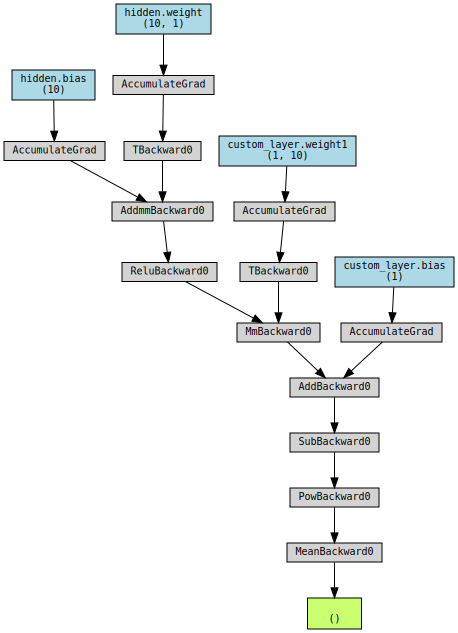

In [ ]:
# Visualizzazione del grafo di autograd
graph1

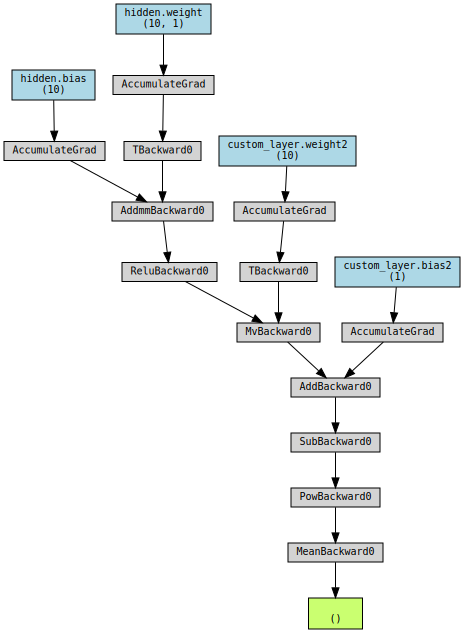

In [ ]:
# Visualizzazione del grafo di autograd
graph2

###Monosemio 1

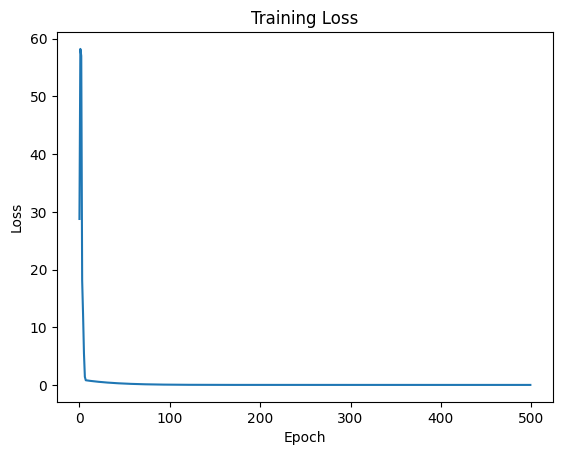

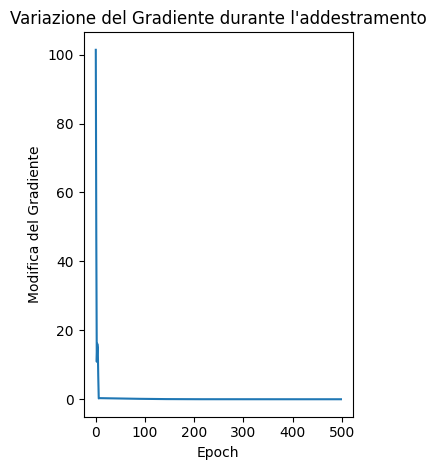

In [ ]:
# Traccia il grafico della loss
plt.plot(range(len(loss_values_m1)), loss_values_m1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(grad_changes_m1)
plt.xlabel('Epoch')
plt.ylabel('Modifica del Gradiente')
plt.title('Variazione del Gradiente durante l\'addestramento')

plt.tight_layout()
plt.show()




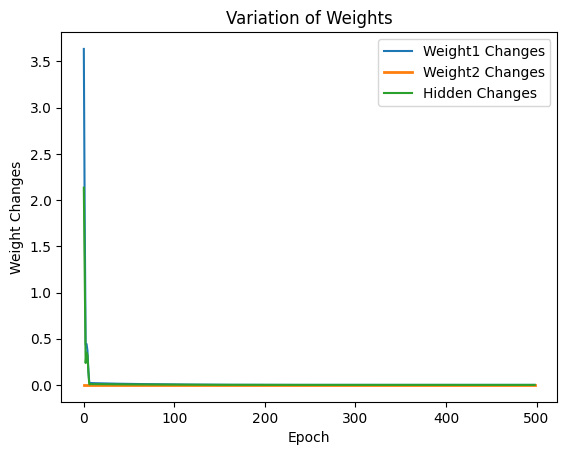

In [ ]:

plt.plot(weight1_changes_m1, label='Weight1 Changes')
plt.plot(weight2_changes_m1, label='Weight2 Changes' ,linewidth=2)
plt.plot(hidden_changes_m1, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()




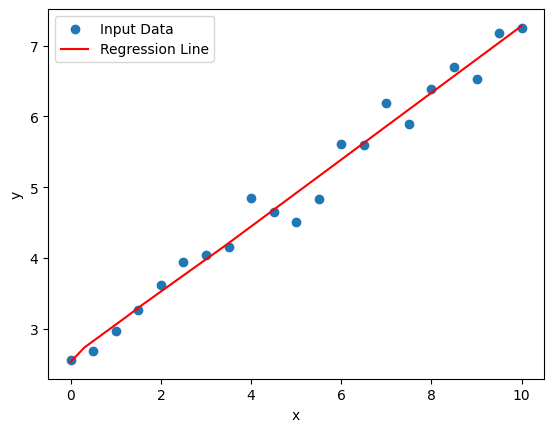

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 1]  # Terza colonna (target del primo infinitesimo)

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()[0]  # Estrai il valore singolo
bias = net.custom_layer.bias.detach().numpy()[0]  # Estrai il valore singolo

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
x_plot_tensor = torch.from_numpy(x_plot.reshape(-1, 1)).float()  # Converte x_plot in un tensore
y_plot_tensor = net(x_plot_tensor)  # Calcola i valori predetti

y_plot = y_plot_tensor.detach().numpy().flatten()  # Converte il tensore in un array NumPy

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()




### Monosemio 2

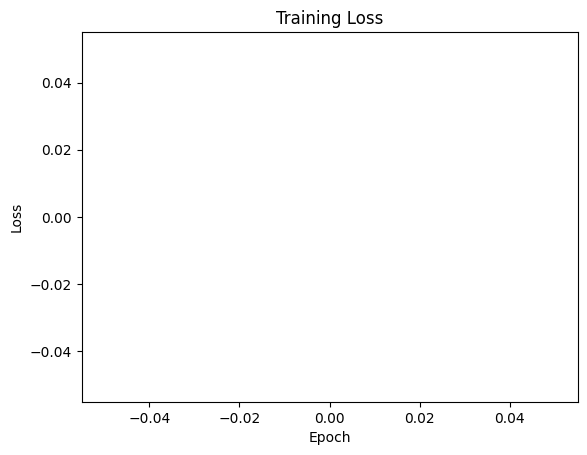

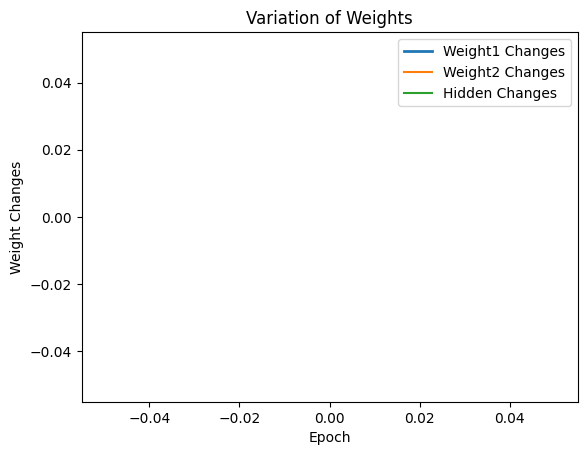

In [ ]:

# Traccia il grafico della loss
plt.plot(range(len(loss_values_m2)), loss_values_m2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()



plt.plot(weight1_changes_m2, label='Weight1 Changes' , linewidth=2)
plt.plot(weight2_changes_m2, label='Weight2 Changes')
plt.plot(hidden_changes_m2, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()




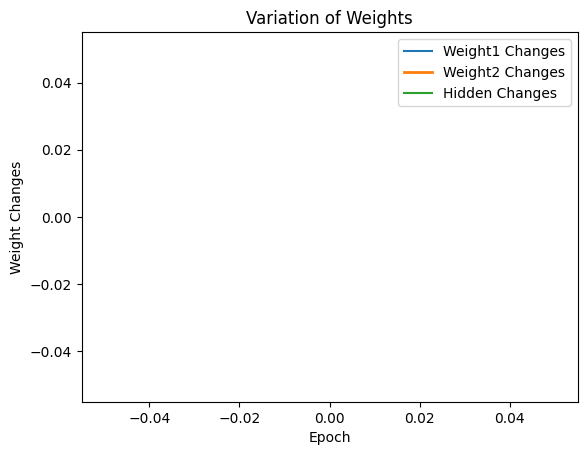

In [ ]:

plt.plot(weight1_changes_m2, label='Weight1 Changes')
plt.plot(weight2_changes_m2, label='Weight2 Changes' ,linewidth=2)
plt.plot(hidden_changes_m2, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()




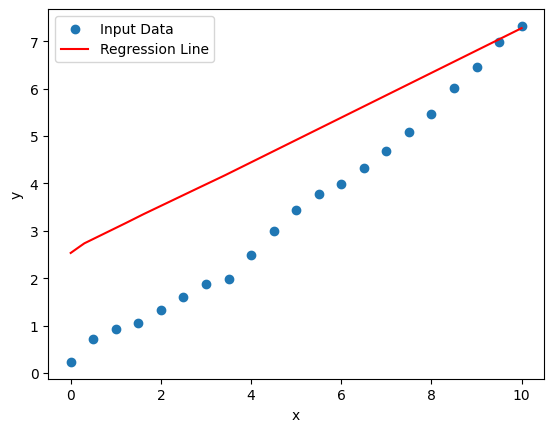

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 2]  # Terza colonna (target del primo infinitesimo)

# Dopo l'addestramento
weight2 = net.custom_layer.weight2.detach().numpy()[0]  # Estrai il valore singolo

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
x_plot_tensor = torch.from_numpy(x_plot.reshape(-1, 1)).float()  # Converte x_plot in un tensore
y_plot_tensor = net(x_plot_tensor)  # Calcola i valori predetti

y_plot = y_plot_tensor.detach().numpy().flatten()  # Converte il tensore in un array NumPy

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## TEST ➝ 4ª implementazione (monosemio 1 & 2 quasi correct)

In [ ]:
# Preparazione dei dati
x_train = torch.tensor(data_na2[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data_na2[:, 1], dtype=torch.float32).unsqueeze(1) #parte standard (1 problema)
y2_train = torch.tensor(data_na2[:, 2], dtype=torch.float32).unsqueeze(1) #parte infinitesima (2 problema)



In [ ]:
import torch.nn.init as init

class CustomNASingleNeuronLayer(nn.Module):
    def __init__(self, input_size, monosemio):
        super(CustomNASingleNeuronLayer, self).__init__()
        self.input_size = input_size
        self.monosemio = monosemio
        self.weight1 = nn.Parameter(torch.Tensor(input_size))
        self.bias = nn.Parameter(torch.Tensor(1))
        self.bias2 = nn.Parameter(torch.Tensor(1))
        self.weight2 = nn.Parameter(torch.Tensor(input_size))
        self.reset_parameters()

    def reset_parameters(self):
        torch.manual_seed(42)
        init.normal_(self.weight1)
        init.normal_(self.bias)
        init.normal_(self.bias2)
        init.normal_(self.weight2)


    def forward(self, x):
        if self.monosemio == 1:
            output = torch.matmul(x, self.weight1.t()) + self.bias
        elif self.monosemio == 2:
            output = torch.matmul(x, self.weight2.t()) + self.bias2
        else:
            raise ValueError("Invalid value for monosemio. Supported values are 1 and 2.")
        return output

    def set_monosemio(self, monosemio):
        self.monosemio = monosemio





In [ ]:


#definizione della dnn con il layer customù

seed = 42
torch.manual_seed(seed)

class NeuralNet(nn.Module):
    def __init__(self , monosemio):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.custom_layer = CustomNASingleNeuronLayer(10, monosemio)  # Custom layer come output layer
        # Impostazione dei pesi desiderati
        self.custom_layer.weight1.data = torch.tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901, 0.0298, -0.3123]])
        self.custom_layer.bias.data = torch.tensor([0.2856])
        self.custom_layer.bias2.data = torch.tensor([0.2856])


    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.custom_layer(x)  # Passaggio attraverso il custom layer
        return x


# Creazione della rete neurale
monosemio = 1
net = NeuralNet(monosemio)
# Stampa dei pesi della rete neurale
for name, param in net.named_parameters():
    print(f'Nome parametro: {name}, Pesi: {param.data}')


print("weight 1 ")
print(net.custom_layer.weight1.data)


Nome parametro: hidden.weight, Pesi: tensor([[ 0.7645],
        [ 0.8300],
        [-0.2343],
        [ 0.9186],
        [-0.2191],
        [ 0.2018],
        [-0.4869],
        [ 0.5873],
        [ 0.8815],
        [-0.7336]])
Nome parametro: hidden.bias, Pesi: tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
        -0.4668,  0.2549])
Nome parametro: custom_layer.weight1, Pesi: tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
          0.0298, -0.3123]])
Nome parametro: custom_layer.bias, Pesi: tensor([0.2856])
Nome parametro: custom_layer.bias2, Pesi: tensor([0.2856])
Nome parametro: custom_layer.weight2, Pesi: tensor([ 1.1103, -1.6898, -0.9890,  0.9580,  1.3221,  0.8172, -0.7658, -0.7506,
         1.3525,  0.6863])
weight 1 
tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
          0.0298, -0.3123]])


In [ ]:
#mse calcolata in base al monosemia
#custom mse
import torch
import torch.nn as nn




class CustomMSELoss2(nn.Module):
    def __init__(self, monosemio):
        super().__init__()  # Utilizza super() senza argomenti
        self.monosemio = monosemio
        self.mse_loss = nn.MSELoss()

    def forward(self, input, target, target1=None):
        if self.monosemio == 1:
            loss = self.mse_loss(input , target)
        elif self.monosemio == 2:
            loss = self.mse_loss(input , target1)
        else:
            raise ValueError("Il valore di monosemio deve essere 1 o 2.")
        return loss


class CustomMSELossProva(nn.Module):
    def __init__(self, monosemio):
        super(CustomMSELossProva, self).__init__()
        self.monosemio = monosemio

    def forward(self, input, target, target1):
        if self.monosemio == 1:
            loss = torch.mean(torch.pow((input - target), 2))  # Confronto tra l'output e il target1
        elif self.monosemio == 2:
            loss = torch.mean(torch.pow((input - target1), 2))  # Confronto tra l'output e il target2
        else:
            raise ValueError("Il valore di monosemio deve essere 1 o 2.")
        return loss






In [ ]:
#funzione per calcolare la loss del monosemio 1 , ache se stiamo modificando il monosemio 2
def compute_loss() :
  #riattacco w1 per computare la loss del w1
  net.custom_layer.weight2.detach_()
  net.custom_layer.bias2.detach_()
  net.custom_layer.weight1.requires_grad_()
  net.custom_layer.bias.requires_grad_()
  net.custom_layer.set_monosemio(1)
  monosemio = 1
  criterion_tmp = CustomMSELossProva(monosemio)
  outputs_tmp = net(x_train)
  loss_tmp = criterion_tmp(outputs_tmp, y_train, y2_train)
  #ripristino la rete
  net.custom_layer.weight1.detach_()
  net.custom_layer.bias.detach_()
  net.custom_layer.weight2.requires_grad_()
  net.custom_layer.bias2.requires_grad_()
  net.custom_layer.set_monosemio(2)
  #print(f'Loss Monosemio 1: {loss_tmp:.4f}')
  return loss_tmp



In [ ]:
def check_update_hidden(projected, loss_m1):
    check = 1
    with torch.no_grad():
        old_hidden_weight = net.hidden.weight.clone()  # backup weight for hidden
        old_hidden_bias = net.hidden.bias.clone()  # backup weight for hidden
        old_bias2_weight = net.custom_layer.bias2.clone()
        old_weight2_weight = net.custom_layer.weight2.clone()
        new_grad = torch.zeros_like(net.hidden.weight)  # Creazione di un tensore di gradiente vuoto con la stessa forma
        new_grad.data.copy_(projected)  # Copia del gradiente modificato nel tensore new_grad
        net.hidden.weight.grad = new_grad  # Assegnazione del tensore new_grad al gradiente del parametro
    # Aggiorna solo i pesi di weight2
    optimizer.step()
    new_loss = compute_loss().item()
    if int(new_loss) != int(loss_m1) :
        with torch.no_grad():
            net.custom_layer.weight2.data = old_weight2_weight.clone()
            net.custom_layer.bias2.data = old_bias2_weight.clone()
            net.hidden.weight.data = old_hidden_weight.clone()
            net.hidden.bias.data = old_hidden_bias.clone()
            check = 0
    #print(check)
    return check


In [ ]:
import torch.nn.init as init

old_grad = None  # Inizializza old_grad come un tensore vuoto

num_epochs_per_monosemio = 500
threshold = 1e-2
loss_values_m1 = []
loss_values_m2 = []
loss_values_m3 = []
old_grad = None
grad_directions = []
weight1_changes_m1 = []
weight2_changes_m1 = []
hidden_changes_m1 = []
grad_changes_m1 = []
weight1_changes_m2 = []  # Lista per memorizzare la variazione dei pesi di weight1
weight2_changes_m2 = []  # Lista per memorizzare la variazione dei pesi di weight2
hidden_changes_m2 = []  # Lista per memorizzare la variazione dei pesi dell'hidden layer
grad_changes_m2 = []



for monosemio in range(1, 2):
    optimizer = optim.SGD(net.parameters(), lr=0.01)
    epoch = 0
    criterion = CustomMSELossProva(monosemio)
    prev_weight1 = None
    prev_weight2 = None
    prev_weight3 = None
    prev_hidden = None
    current_loss = 300
    while epoch < num_epochs_per_monosemio and current_loss > threshold:

        if monosemio == 1:
            optimizer.zero_grad()
            if epoch == 0:
                net.custom_layer.weight2.detach_()
                net.custom_layer.bias2.detach_()
                net.custom_layer.weight1.requires_grad_()
            outputs = net(x_train)
            outputs = outputs.unsqueeze(1)
            loss = criterion(outputs, y_train, y2_train)


            loss.backward()

            backward_gradients = []
            for name, param in net.named_parameters():
                if param.grad is not None:
                    backward_gradients.append((name, param.grad.clone()))

            optimizer.step()

            if epoch > 0:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m1.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m1.append(weight2_change)
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m1.append(hidden_change)
                grad_change = torch.norm(net.hidden.weight.grad)
                grad_changes_m1.append(grad_change.item())

            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_hidden = net.hidden.weight.clone()
            current_loss = loss.item()
            loss_values_m1.append(current_loss)
            old_grad = net.hidden.weight.grad.clone()

            # Creazione del grafo di autograd
            graph1 = make_dot(loss, params=dict(net.named_parameters()))
            old_weight1 = net.custom_layer.weight1.data.squeeze()

        elif monosemio == 2:
            # Azzerare i gradienti per evitare l'accumulo
            optimizer.zero_grad()
            if epoch==0 :
                current_loss = 300
                #old_grad = net.hidden.weight.grad.clone()
                net.custom_layer.weight1.detach_()
                net.custom_layer.bias.detach_()
                net.custom_layer.bias2.requires_grad_()
                net.custom_layer.weight2.requires_grad_()
            # Imposta monosemio = 2 nella rete neurale
            net.custom_layer.set_monosemio(2)
            # Esegui il forward pass
            outputs = net(x_train)
            loss = criterion(outputs, y_train, y2_train)
            last_loss = loss.item()
            loss.backward()
            graph2 = make_dot(loss, params=dict(net.named_parameters()))
            current_loss = loss.item()

            '''
            #SENZA LOSS CHECK
            #proiezione del gradiente all'ortogonale dei pesi W1
            if old_weight1 is not None:
              new_grad = net.hidden.weight.grad.clone().squeeze()  # Riduce la dimensionalità a 1D
              #vettore ortogonale al vettore dei pesi w1
              orthogonal_vector = torch.tensor([-old_weight1[1], old_weight1[0], -old_weight1[3], old_weight1[2], -old_weight1[5], old_weight1[4], -old_weight1[7], old_weight1[6], -old_weight1[9], old_weight1[8]])  # Calcolo del vettore ortogonale
              #calcolo la proiezione
              dot_product = torch.dot(new_grad, orthogonal_vector)
              norm_squared = torch.dot(orthogonal_vector, orthogonal_vector)
              projected = (dot_product / norm_squared) * orthogonal_vector
              projected = projected.reshape(net.hidden.weight.grad.shape) #lo fa ritornare 2D
              #net.hidden.weight.grad.data.copy_(projected)
              with torch.no_grad():
                new_grad = torch.zeros_like(net.hidden.weight)  # Creazione di un tensore di gradiente vuoto con la stessa forma
                new_grad.data.copy_(projected)  # Copia del gradiente modificato nel tensore new_grad
                net.hidden.weight.grad = new_grad  # Assegnazione del tensore new_grad al gradiente del parametro
              # Aggiorna solo i pesi di weight2
              optimizer.step()

            #CON LOSS CHECK
            #proiezione del gradiente all'ortogonale dei pesi W1 solo se old_loss_m1==new_loss_m1
            if old_weight1 is not None:
              new_grad = net.hidden.weight.grad.clone().squeeze()  # Riduce la dimensionalità a 1D
              #vettore ortogonale al vettore dei pesi w1
              orthogonal_vector = torch.tensor([-old_weight1[1], old_weight1[0], -old_weight1[3], old_weight1[2], -old_weight1[5], old_weight1[4], -old_weight1[7], old_weight1[6], -old_weight1[9], old_weight1[8]])  # Calcolo del vettore ortogonale
              #calcolo la proiezione
              dot_product = torch.dot(new_grad, orthogonal_vector)
              norm_squared = torch.dot(orthogonal_vector, orthogonal_vector)
              projected = (dot_product / norm_squared) * orthogonal_vector
              projected = projected.reshape(net.hidden.weight.grad.shape) #lo fa ritornare 2D
              check_update_hidden(projected , last_loss )
            '''
            '''
            METTI QUI IL CODICE PER TESTARE LA PROIEZIONE
            '''
            if old_weight1 is not None:
              new_grad = net.hidden.weight.grad.clone().squeeze()  # Riduce la dimensionalità a 1D
              #vettore ortogonale al vettore dei pesi w1
              orthogonal_vector = torch.tensor([-old_weight1[1], old_weight1[0], -old_weight1[3], old_weight1[2], -old_weight1[5], old_weight1[4], -old_weight1[7], old_weight1[6], -old_weight1[9], old_weight1[8]])  # Calcolo del vettore ortogonale
              #calcolo la proiezione
              dot_product = torch.dot(new_grad, orthogonal_vector)
              norm_squared = torch.dot(orthogonal_vector, orthogonal_vector)
              projected = (dot_product / norm_squared) * orthogonal_vector
              projected = projected.reshape(net.hidden.weight.grad.shape) #lo fa ritornare 2D
              #net.hidden.weight.grad.data.copy_(projected)
              with torch.no_grad():
                new_grad = torch.zeros_like(net.hidden.weight)  # Creazione di un tensore di gradiente vuoto con la stessa forma
                new_grad.data.copy_(projected)  # Copia del gradiente modificato nel tensore new_grad
                net.hidden.weight.grad = new_grad  # Assegnazione del tensore new_grad al gradiente del parametro
              # Aggiorna solo i pesi di weight2
              optimizer.step()

            '''
            END TEST PROIEZIONE
            '''


            loss_values_m2.append(current_loss)  # Aggiungi il valore di loss alla lista
            if epoch > 1:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m2.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m2.append(weight2_change)
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m2.append(hidden_change)
            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_hidden = net.hidden.weight.clone()


        else:
            raise ValueError("Il valore di monosemio deve essere compreso tra 1 e 2.")

        epoch += 1

        if epoch % 100 == 0 :
            print(f'Monosemio: {monosemio}, Epoch {epoch}/{num_epochs_per_monosemio}, Loss: {current_loss:.4f}')
            if monosemio > 1 :
              print(f' Loss monosemio 1 : {compute_loss():.4f}')



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([21, 1])) that is different to the input size (torch.Size([21, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Monosemio: 1, Epoch 100/500, Loss: 2.0986
Monosemio: 1, Epoch 200/500, Loss: 2.0765
Monosemio: 1, Epoch 300/500, Loss: 2.0715
Monosemio: 1, Epoch 400/500, Loss: 2.0652
Monosemio: 1, Epoch 500/500, Loss: 2.0684


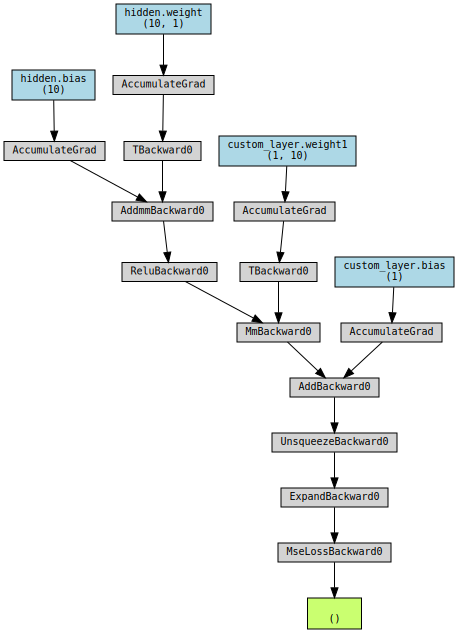

In [ ]:
# Visualizzazione del grafo di autograd
graph1

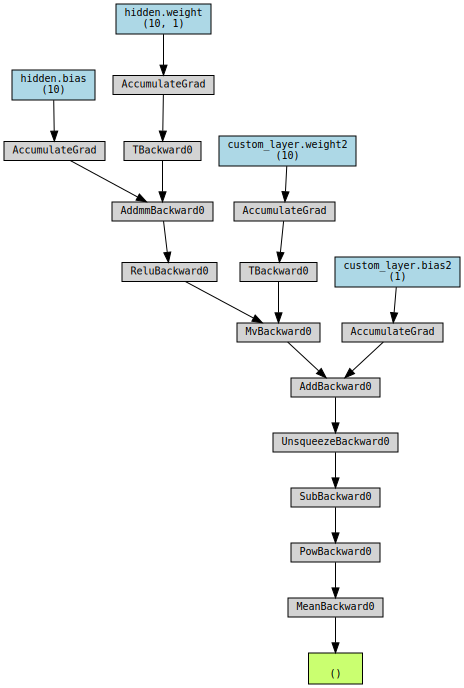

In [ ]:
# Visualizzazione del grafo di autograd
graph2

###Monosemio 1

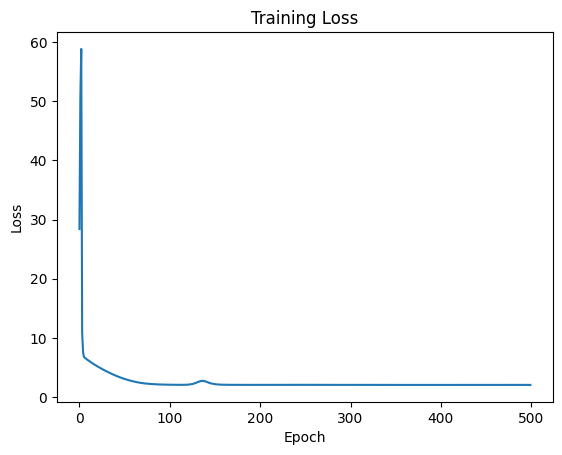

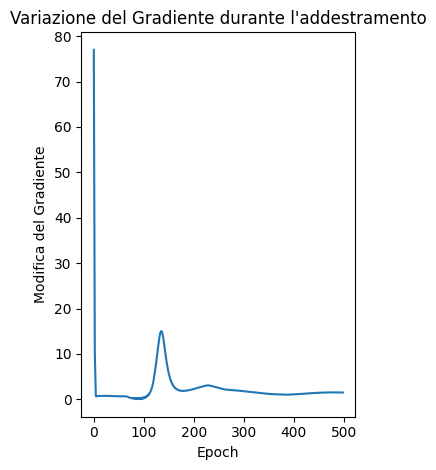

In [ ]:
# Traccia il grafico della loss
plt.plot(range(len(loss_values_m1)), loss_values_m1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(grad_changes_m1)
plt.xlabel('Epoch')
plt.ylabel('Modifica del Gradiente')
plt.title('Variazione del Gradiente durante l\'addestramento')

plt.tight_layout()
plt.show()




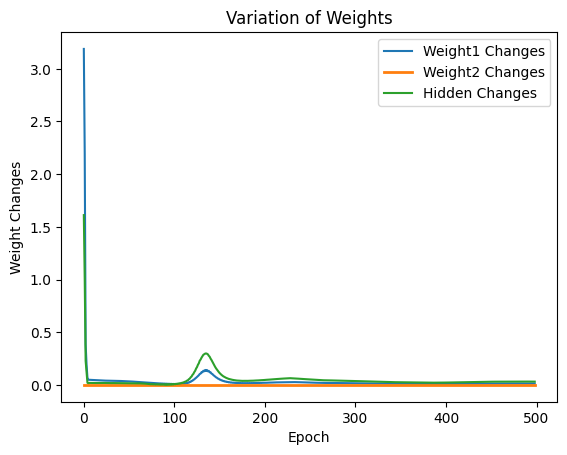

In [ ]:

plt.plot(weight1_changes_m1, label='Weight1 Changes')
plt.plot(weight2_changes_m1, label='Weight2 Changes' ,linewidth=2)
plt.plot(hidden_changes_m1, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()




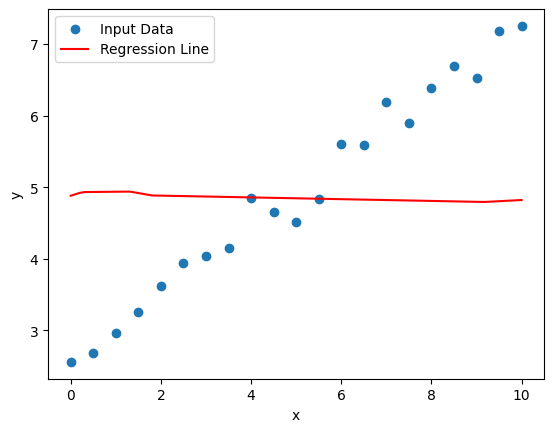

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 1]  # Terza colonna (target del primo infinitesimo)
net.custom_layer.set_monosemio(1)

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()[0]  # Estrai il valore singolo
bias = net.custom_layer.bias.detach().numpy()[0]  # Estrai il valore singolo

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
x_plot_tensor = torch.from_numpy(x_plot.reshape(-1, 1)).float()  # Converte x_plot in un tensore
y_plot_tensor = net(x_plot_tensor)  # Calcola i valori predetti

y_plot = y_plot_tensor.detach().numpy().flatten()  # Converte il tensore in un array NumPy

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()




###Monosemio 2

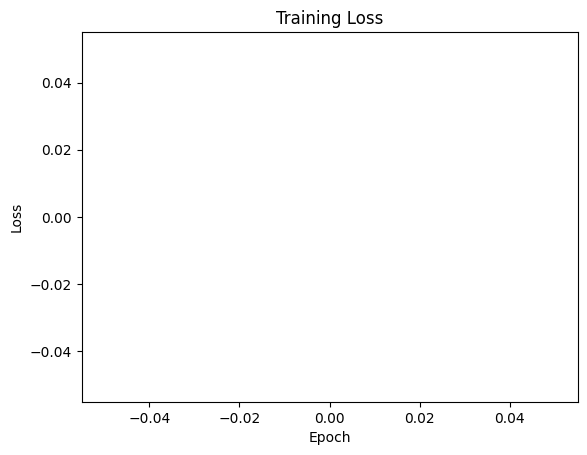

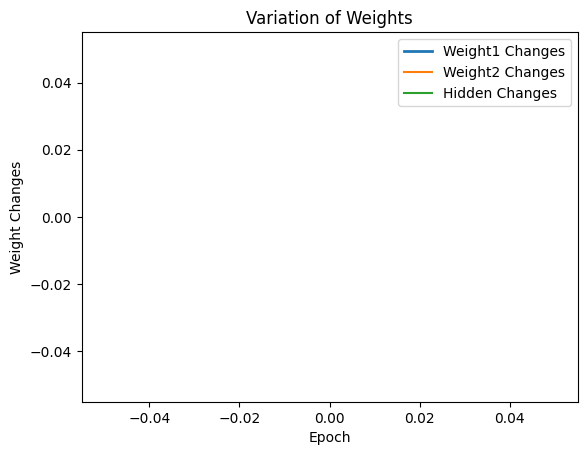

In [ ]:

# Traccia il grafico della loss
plt.plot(range(len(loss_values_m2)), loss_values_m2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()



plt.plot(weight1_changes_m2, label='Weight1 Changes' , linewidth=2)
plt.plot(weight2_changes_m2, label='Weight2 Changes')
plt.plot(hidden_changes_m2, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()




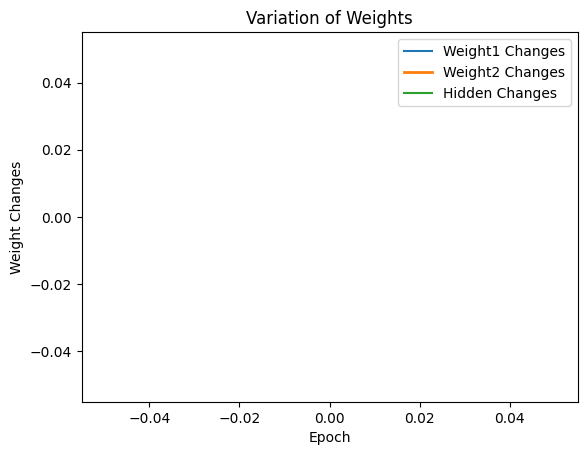

In [ ]:

plt.plot(weight1_changes_m2, label='Weight1 Changes')
plt.plot(weight2_changes_m2, label='Weight2 Changes' ,linewidth=2)
plt.plot(hidden_changes_m2, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()




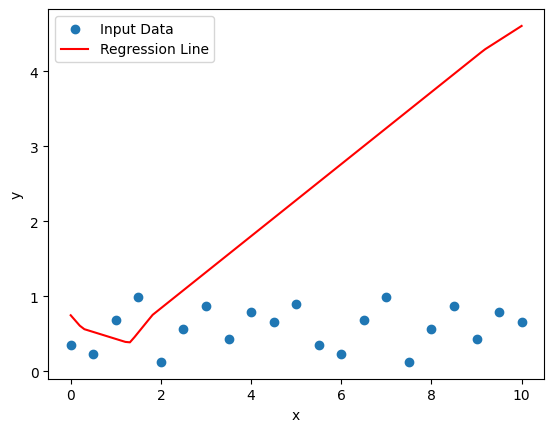

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 2]  # Terza colonna (target del primo infinitesimo)
net.custom_layer.set_monosemio(2)
net.custom_layer.weight1.detach_()
net.custom_layer.bias.detach_()
net.custom_layer.bias2.requires_grad_()
net.custom_layer.weight2.requires_grad_()

# Dopo l'addestramento
weight2 = net.custom_layer.weight2.detach().numpy()[0]  # Estrai il valore singolo
bias2 = net.custom_layer.bias2.detach().numpy()[0]  # Estrai il valore singolo

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
x_plot_tensor = torch.from_numpy(x_plot.reshape(-1, 1)).float()  # Converte x_plot in un tensore
y_plot_tensor = net(x_plot_tensor)  # Calcola i valori predetti

y_plot = y_plot_tensor.detach().numpy().flatten()  # Converte il tensore in un array NumPy

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


<ipython-input-90-5f2ac3ce644a>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x_train, dtype=torch.float32)


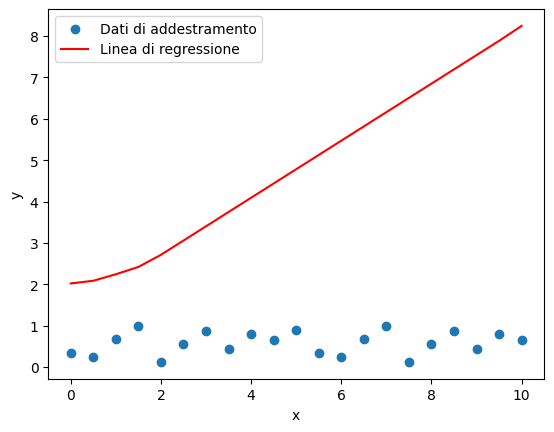

In [90]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

x = torch.tensor(x_train, dtype=torch.float32)
x_hidden = net.hidden(x)
x_relu = net.relu(x_hidden)
output = net.custom_layer(x_relu)

x_train_np = x_train.numpy()
output_np = output.detach().numpy()

plt.scatter(x_train_np, y2_train, label='Dati di addestramento')
plt.plot(x_train_np, output_np, color='r', label='Linea di regressione')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
